In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

file = scipy.io.loadmat("/home/andrei/Desktop/COURSE_SMNT/ASS_2/HW2_EncodingModels.mat")

print(file.keys())

dict_keys(['__header__', '__version__', '__globals__', 'RA_Spikes1', 'RA_Spikes2', 'SA1_Spikes1', 'SA1_Spikes2', 'Stim1', 'Stim2'])


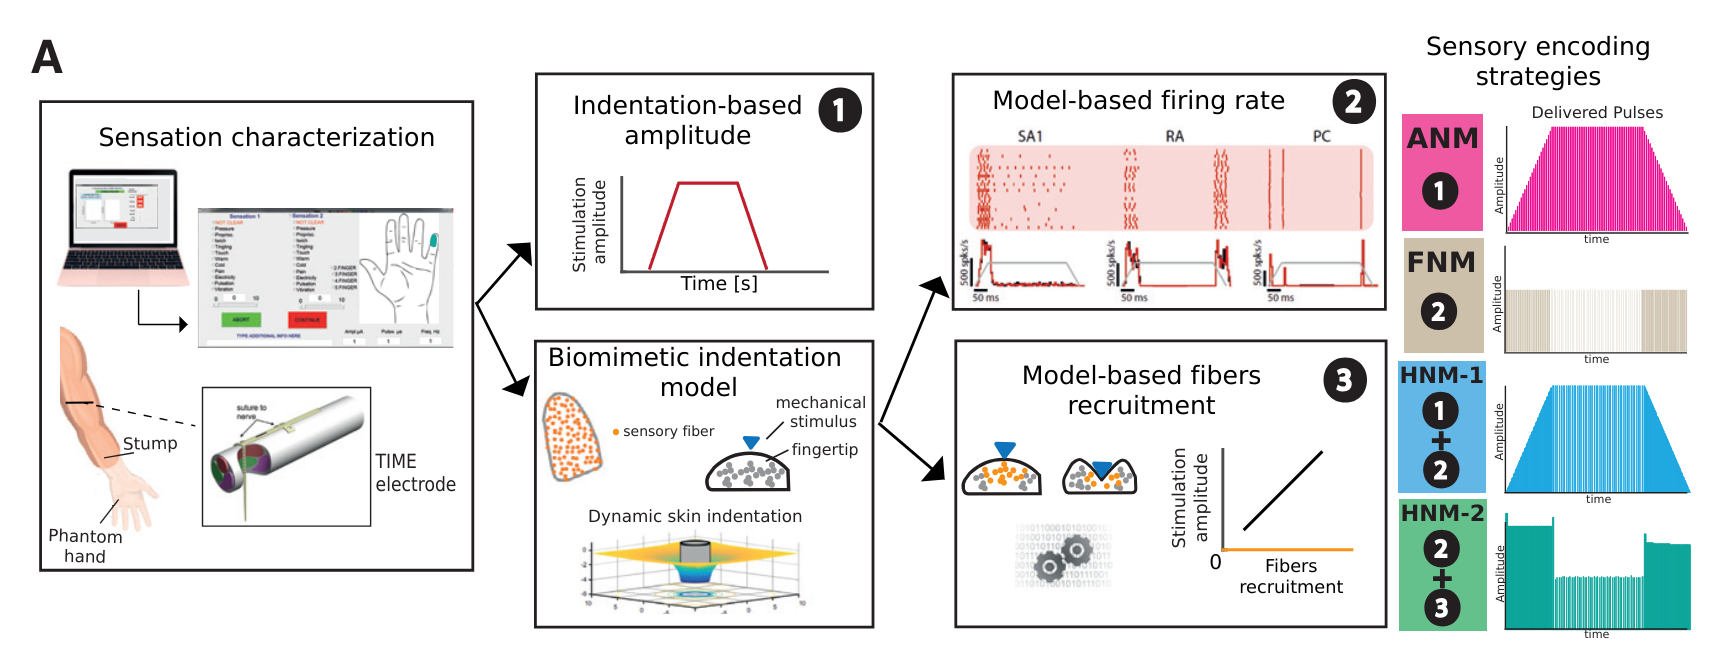

In [3]:
# X_train shape: (variable, timepoint)
#   Here, the variables are 1, x_pos, y_pos, x_vel, y_vel

# R_train shape: (variable, timepoint)
#   Here, the variables are the firing rates of 113 neurons from the somatosensory Area 2.

print(file["RA_Spikes1"].shape)
print(file["RA_Spikes2"].shape)
print(file["SA1_Spikes1"].shape)
print(file["SA1_Spikes2"].shape)
print(file["Stim1"].shape)
print(file["Stim2"].shape)
# all numpy arrays


"""
Stim1 = ramping stimuli 
Stim2 = stepping stimuli

3 x 6500 
    = level of force x column
    value = s_N

RA_Spikes, SA_Spikes = simulated spiking of mechanoreceptors to each stimulus type 
    (1 to Stim1, 2 to Stim2)

50 x 6500 x 3
    = mechanoreceptor x time x force
    value = neuronal response



"""

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]
Stim1 = file["Stim1"]
Stim2 = file["Stim2"]



(50, 6500, 3)
(50, 6500, 3)
(50, 6500, 3)
(50, 6500, 3)
(3, 6500)
(3, 6500)


# Questions 1, 2
Given the ramping (1) and stepping (2) stimuli, translate the sensor reading and TouchSim responses
into stimulation parameters for each of the four encoding models. Use the following parame-
ters for the encoding models:



For each encoding model, plot how the stimulation amplitude and pulse frequencies vary over
time

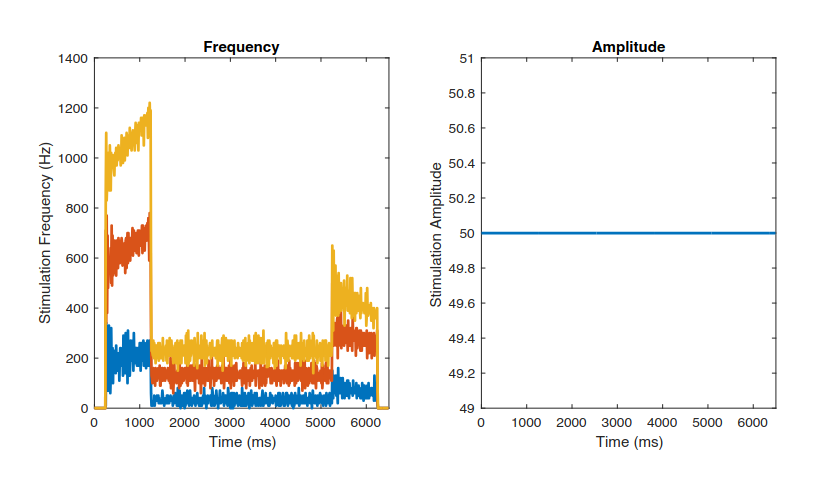

## Encoding model 1: ANM
use the following formula to turn the stimuli (s) into neuronal activations (A).

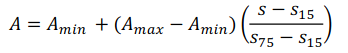

pulse freq $F$ is fixed to 50 Hz

In [49]:
A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000

A1 = np.zeros([3, 6500]) 
A2 = np.zeros([3, 6500])

# F is fixed at 50 Hz, so I'll bin (take the mean) of every 20 ms in Stim
chunk_size = 20
Stim1_aux = Stim1.reshape(3, -1, chunk_size)

Stim1_binned = np.mean(Stim1_aux, axis=2)

Stim2_aux = Stim2.reshape(3, -1, chunk_size)
Stim2_binned = np.mean(Stim2_aux, axis=2)


s1_15 = (np.max(Stim1_binned) - np.min(Stim1_binned)) * (15/100)
s2_15 = (np.max(Stim2_binned) - np.min(Stim2_binned))* (15/100)

s1_75 = (np.amax(Stim1_binned) - np.min(Stim1_binned)) * (75/100)
s2_75 = (np.amax(Stim2_binned) - np.min(Stim2_binned))* (75/100)

print("s1_75:", s1_75)
print("number of values > s1_75:", (Stim1_binned > s1_75).sum())
A1_binned = np.copy(Stim1_binned)
A1_binned = np.where(A1_binned > s1_75, A_max, np.where(A1_binned < s1_15, 0, A_min + (A_max - A_min) * ((A1_binned - s1_15) / (s1_75 - s1_15))))
A2_binned = np.copy(Stim2_binned)
A2_binned = np.where(A2_binned > s2_75, A_max, np.where(A2_binned < s2_15, 0, A_min + (A_max - A_min) * ((A2_binned - s2_15) / (s2_75 - s2_15))))

# A1_binned = A_min + (A_max- A_min) * ((Stim1_binned - s1_15)/(s1_75-s1_15))
# A2_binned = A_min + (A_max- A_min) * ((Stim2_binned - s2_15)/(s2_75-s2_15))

print("Stim binned shape = ", np.shape(Stim1_binned), "it should be ", (3, 6500/20))
print("A1_binned shape: ", np.shape(A1_binned), "it should be (3, 325)")

repeat_factor = 20

# A1_aux = A1_binned[:, :, np.newaxis]
A1 = np.repeat(A1_binned, repeat_factor, axis=1)

# A2_aux = A2_binned[:, :, np.newaxis]
A2 = np.repeat(A2_binned, repeat_factor, axis=1)

print("A1 final shape: ", np.shape(A1), "it should be (3, 6500)")

print("np.max: ", np.max(Stim1_binned))
print("np.amax: ", np.amax(Stim1_binned)) # I expect them to be equal -> they are, good

print("75 percent of max:", np.max(Stim1_binned) * (75/100))
print("15 percent of max:", np.max(Stim1_binned) * (15/100))



s1_75: 71.25
number of values > s1_75: 225
Stim binned shape =  (3, 325) it should be  (3, 325.0)
A1_binned shape:  (3, 325) it should be (3, 325)
A1 final shape:  (3, 6500) it should be (3, 6500)
np.max:  95.0
np.amax:  95.0
75 percent of max: 71.25
15 percent of max: 14.25


## Plotting

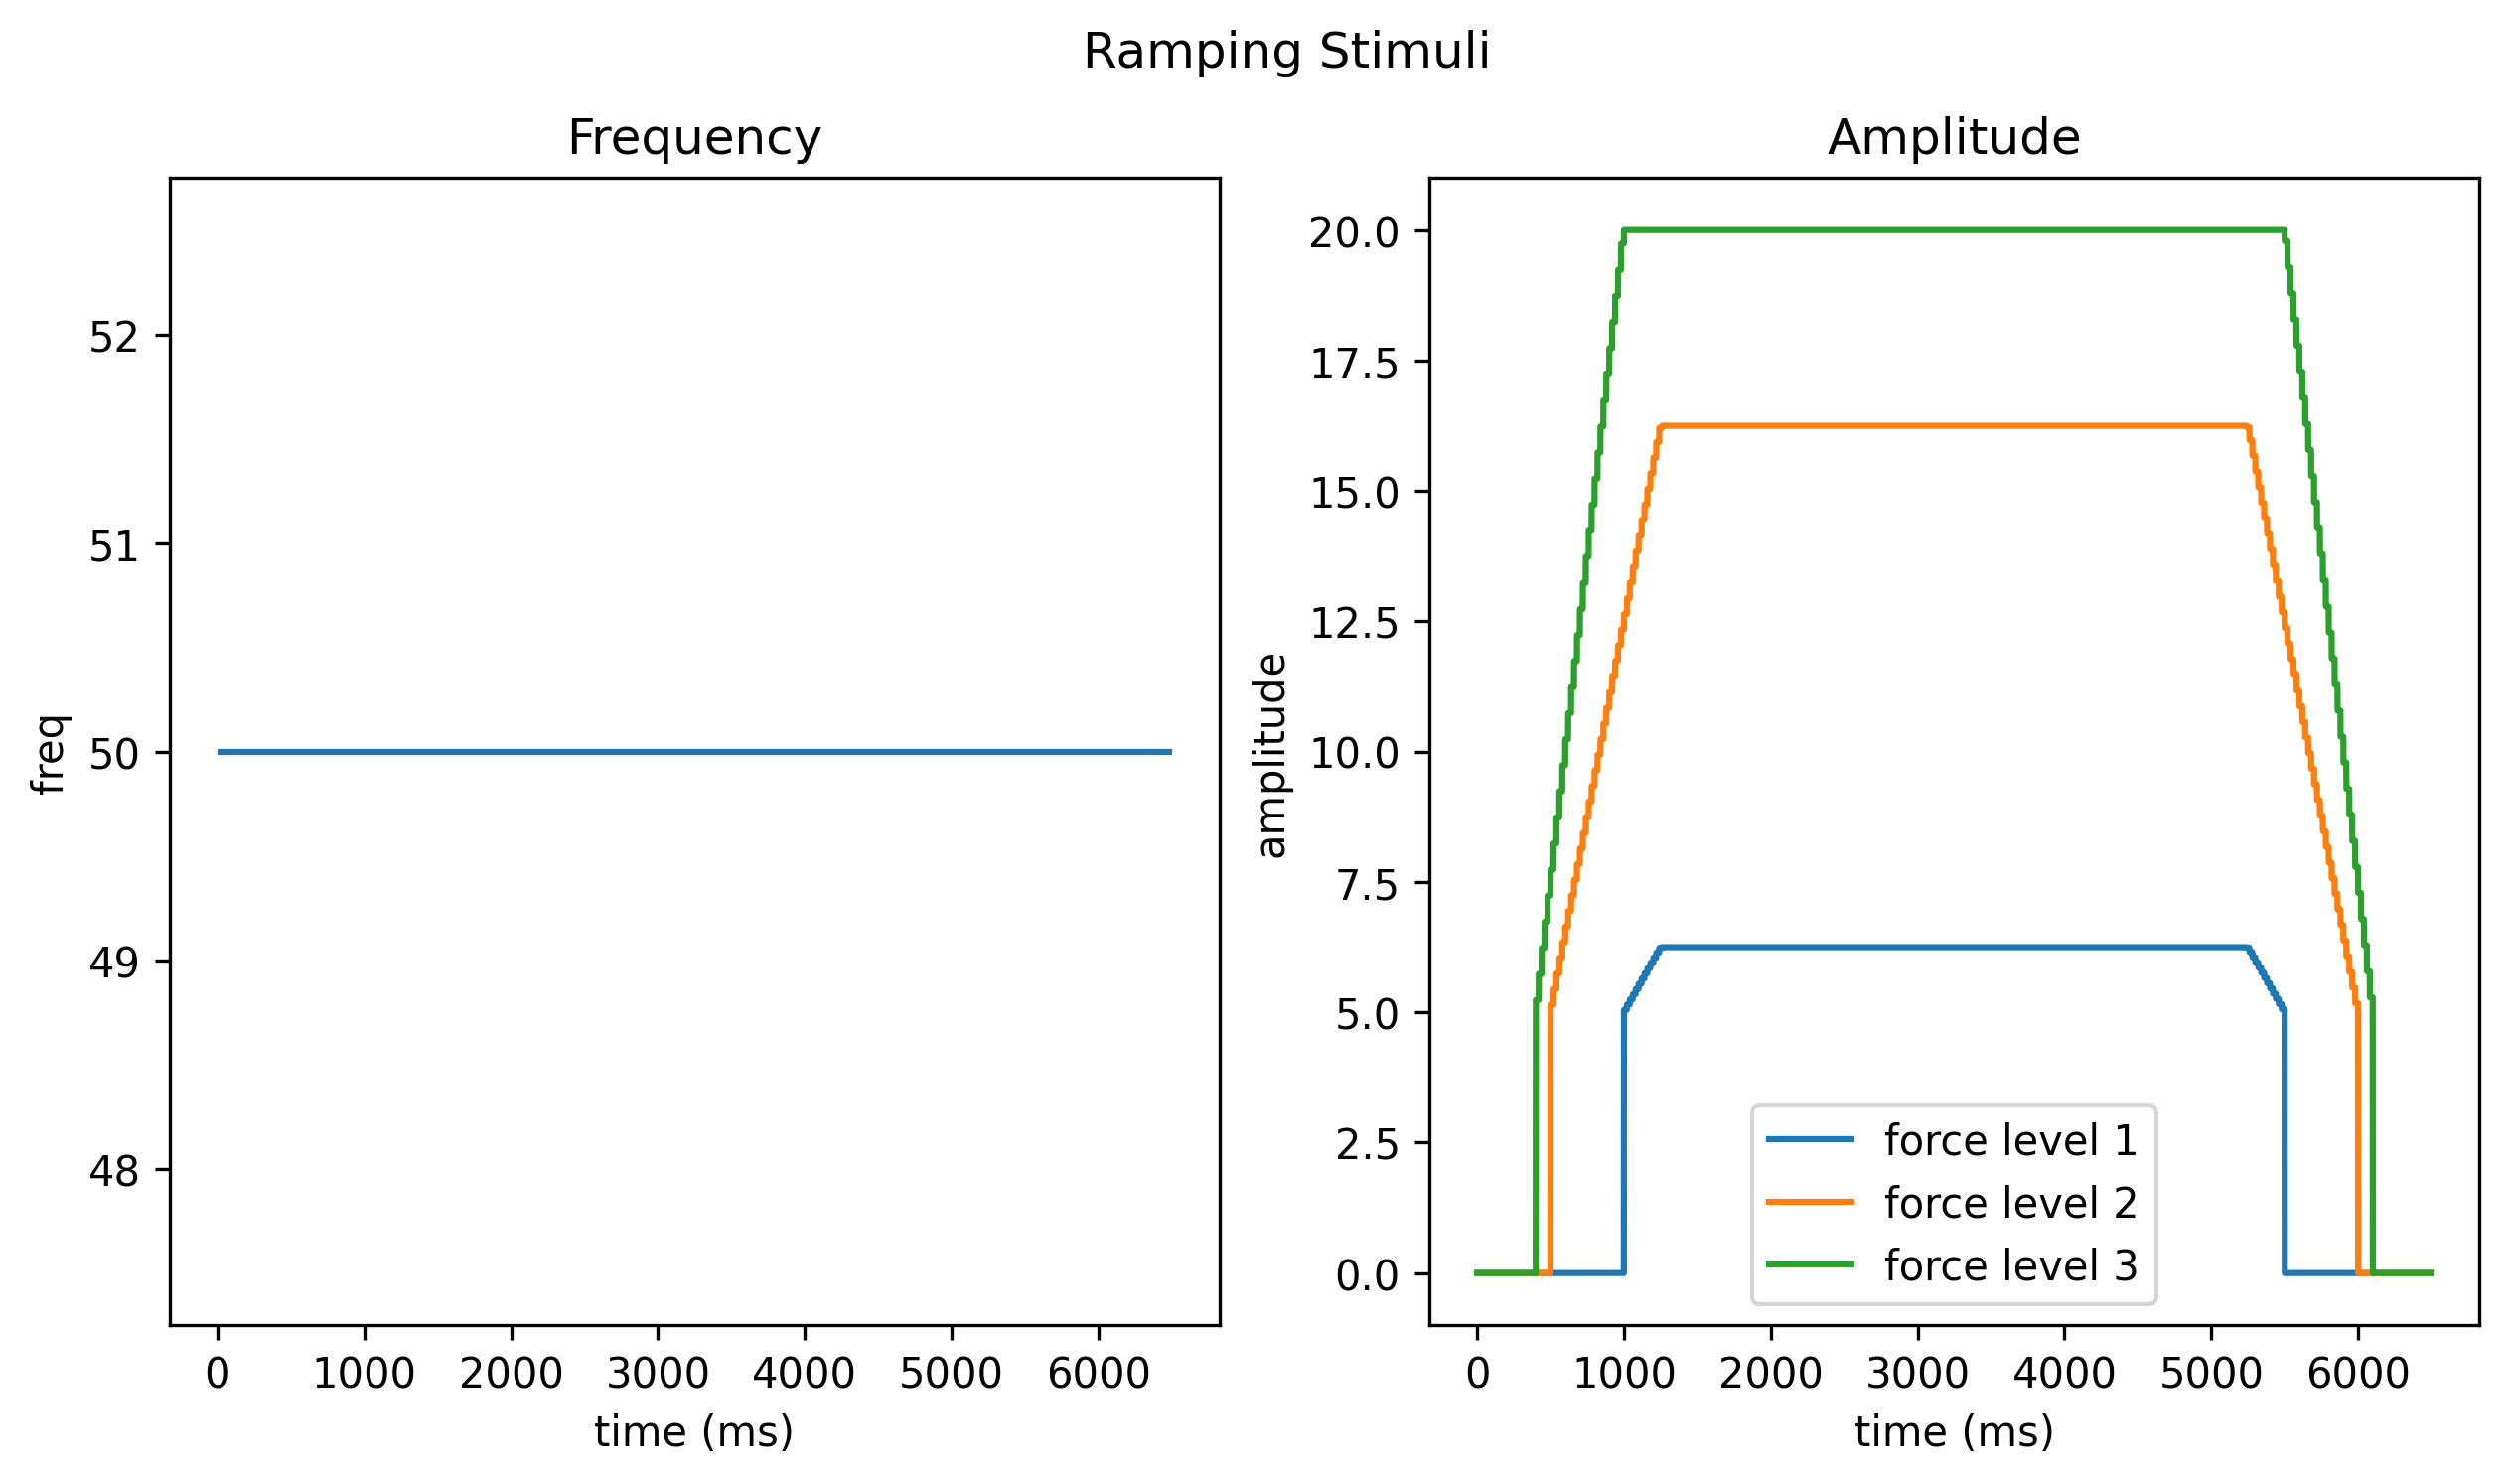

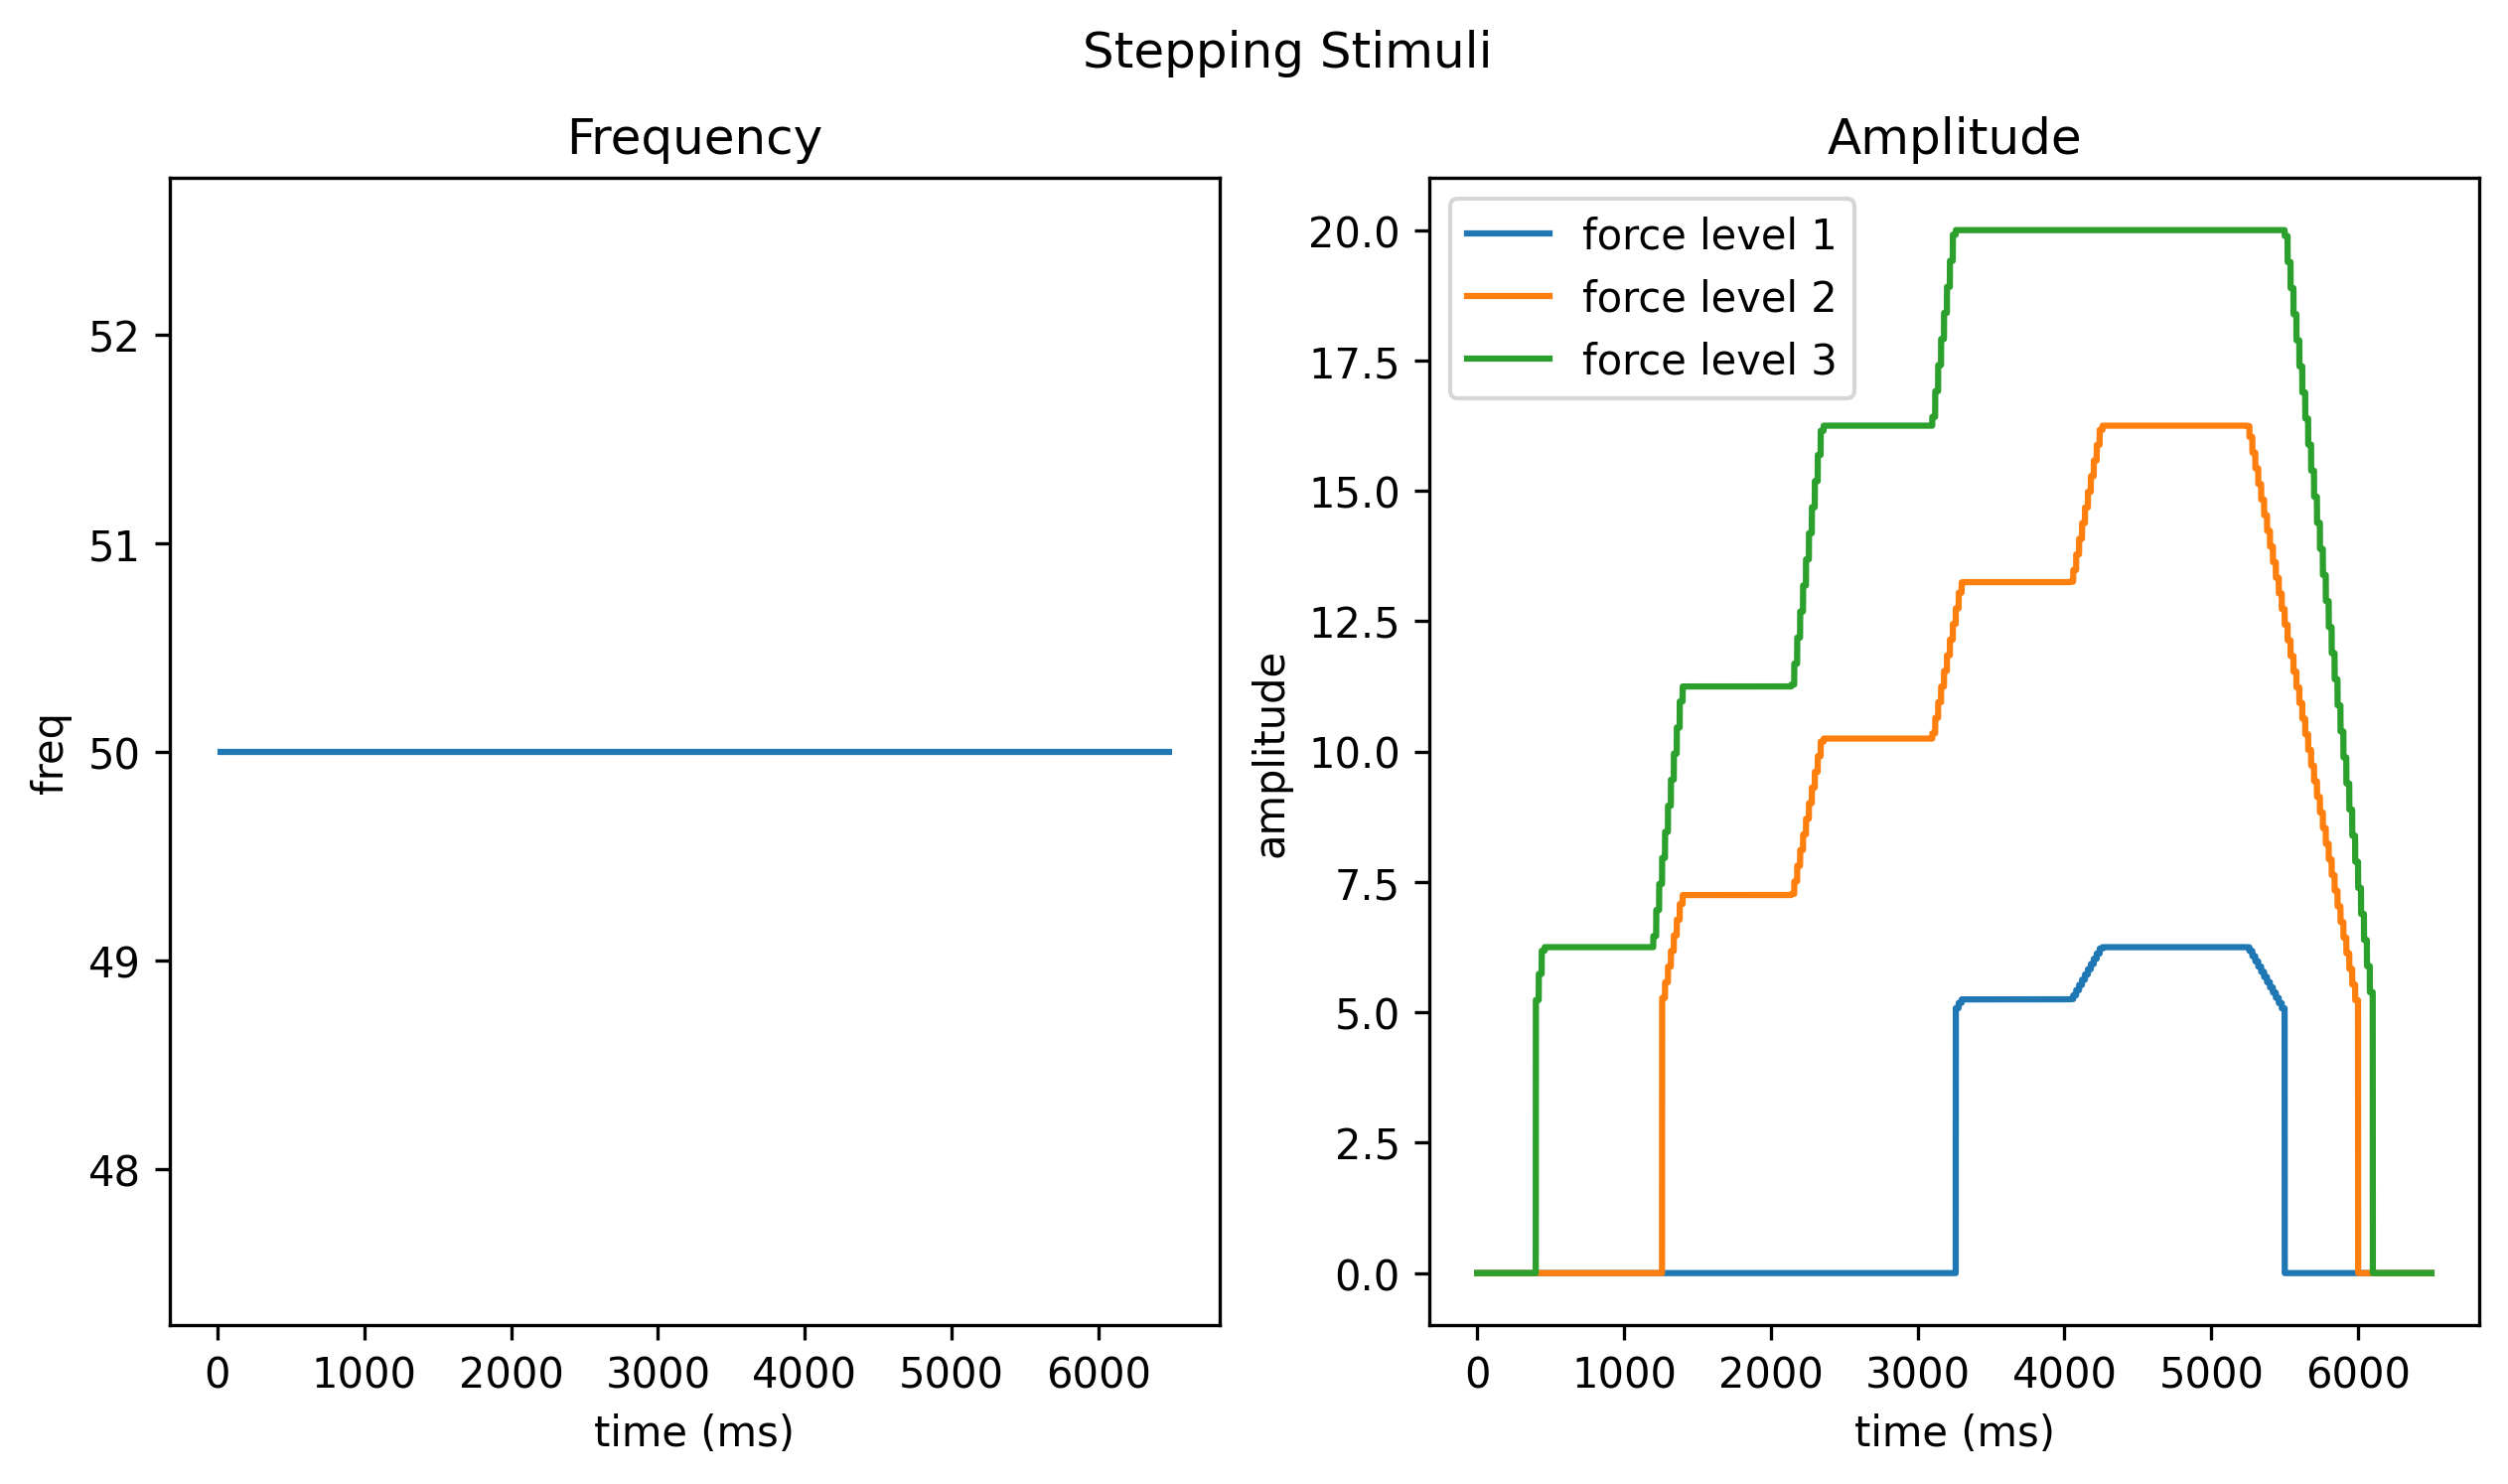

In [50]:

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A1):
    ax[1].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

ax[1].legend()
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].hlines(50, xmin = 0, xmax = 6500)
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

fig.suptitle("Ramping Stimuli")

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A2):
    ax[1].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

ax[1].legend()
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].hlines(50, xmin = 0, xmax = 6500)
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")






fig.suptitle("Stepping Stimuli")


plt.show()

## Encoding model 2: FNM
- starting from simulated RA and SA activity (instead of Stim)
- **Amplitude fixed** to (A_max + A_min) / 2
- The **activity of each mechanoreceptor is summed** to create a vector of population spike
timings, 𝑅.
- population **activity $R$ binned (average) for each 10 ms => $R_{bin}$**. When plotting, convert it to Hz


In [75]:
# DEPRECATED, ueing wrong binning

# A_min = 5
# A_max = 20
# F_min = 0
# F_max = 1000
# R_max = 1000

# A_fixed = np.mean([A_min, A_max])
# print("A_fixed: ", A_fixed)

# RA_Spikes1 = file["RA_Spikes1"]
# RA_Spikes2 = file["RA_Spikes2"]
# SA1_Spikes1 = file["SA1_Spikes1"]
# SA1_Spikes2 = file["SA1_Spikes2"]

# print(np.shape(RA_Spikes1))

# RA_population1 = np.sum(RA_Spikes1, axis= 0)
# RA_population2 = np.sum(RA_Spikes2, axis= 0)
# SA_population1 = np.sum(SA1_Spikes1, axis= 0)
# SA_population2 = np.sum(SA1_Spikes2, axis= 0)


# print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")

# # Step 4) The activity of each mechanoreceptor is summed to create a vector of population spike timings, 𝑅

# R1 = np.sum(np.array([ RA_population1,  SA_population1 ]), axis=0)
# R2 = np.sum(np.array([ RA_population2,  SA_population2 ]), axis=0)

# print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")


# bin_size = 10
# R1_aux = R1.reshape(-1, 3, bin_size)
# R1_binned = np.mean(R1_aux, axis=2)

# R2_aux = R2.reshape(-1, 3, bin_size)
# R2_binned = np.mean(R2_aux, axis=2)


# print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")


A_fixed:  12.5
(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)


In [13]:

A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000

A_fixed = np.mean([A_min, A_max])
print("A_fixed: ", A_fixed)

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

print(np.shape(RA_Spikes1))

RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")

# Step 4) The activity of each mechanoreceptor is summed to create a vector of population spike timings, 𝑅

R1 = np.sum(np.array([ RA_population1,  SA_population1 ]), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ]), axis=0)

print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")


bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")



A_fixed:  12.5
(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)


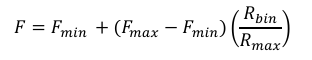

In [14]:
F1_binned = np.copy(R1_binned)
F1_binned =  F1_binned   # transforming spikes per 10 ms bin into Hz

# when R_bin > R_max
F1_binned = np.where(F1_binned > R_max, F_max,  F_min + (F_max - F_min) * (R1_binned/R_max))

print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

repeat_factor = 10   
F1 = np.repeat(F1_binned, repeat_factor, axis=0)



F2_binned = np.copy(R2_binned)
F2_binned = F2_binned   # transforming spikes per 10 ms bin into Hz
F2_binned = np.where(F2_binned > R_max, F_max,  F_min + (F_max - F_min) * (R2_binned/R_max))

print("F2_binned shape: ", np.shape(F2_binned), "should be (650, 3)")

repeat_factor = 10   
F2 = np.repeat(F2_binned, repeat_factor, axis=0)


F1_binned shape:  (650, 3) should be (650, 3)
F2_binned shape:  (650, 3) should be (650, 3)


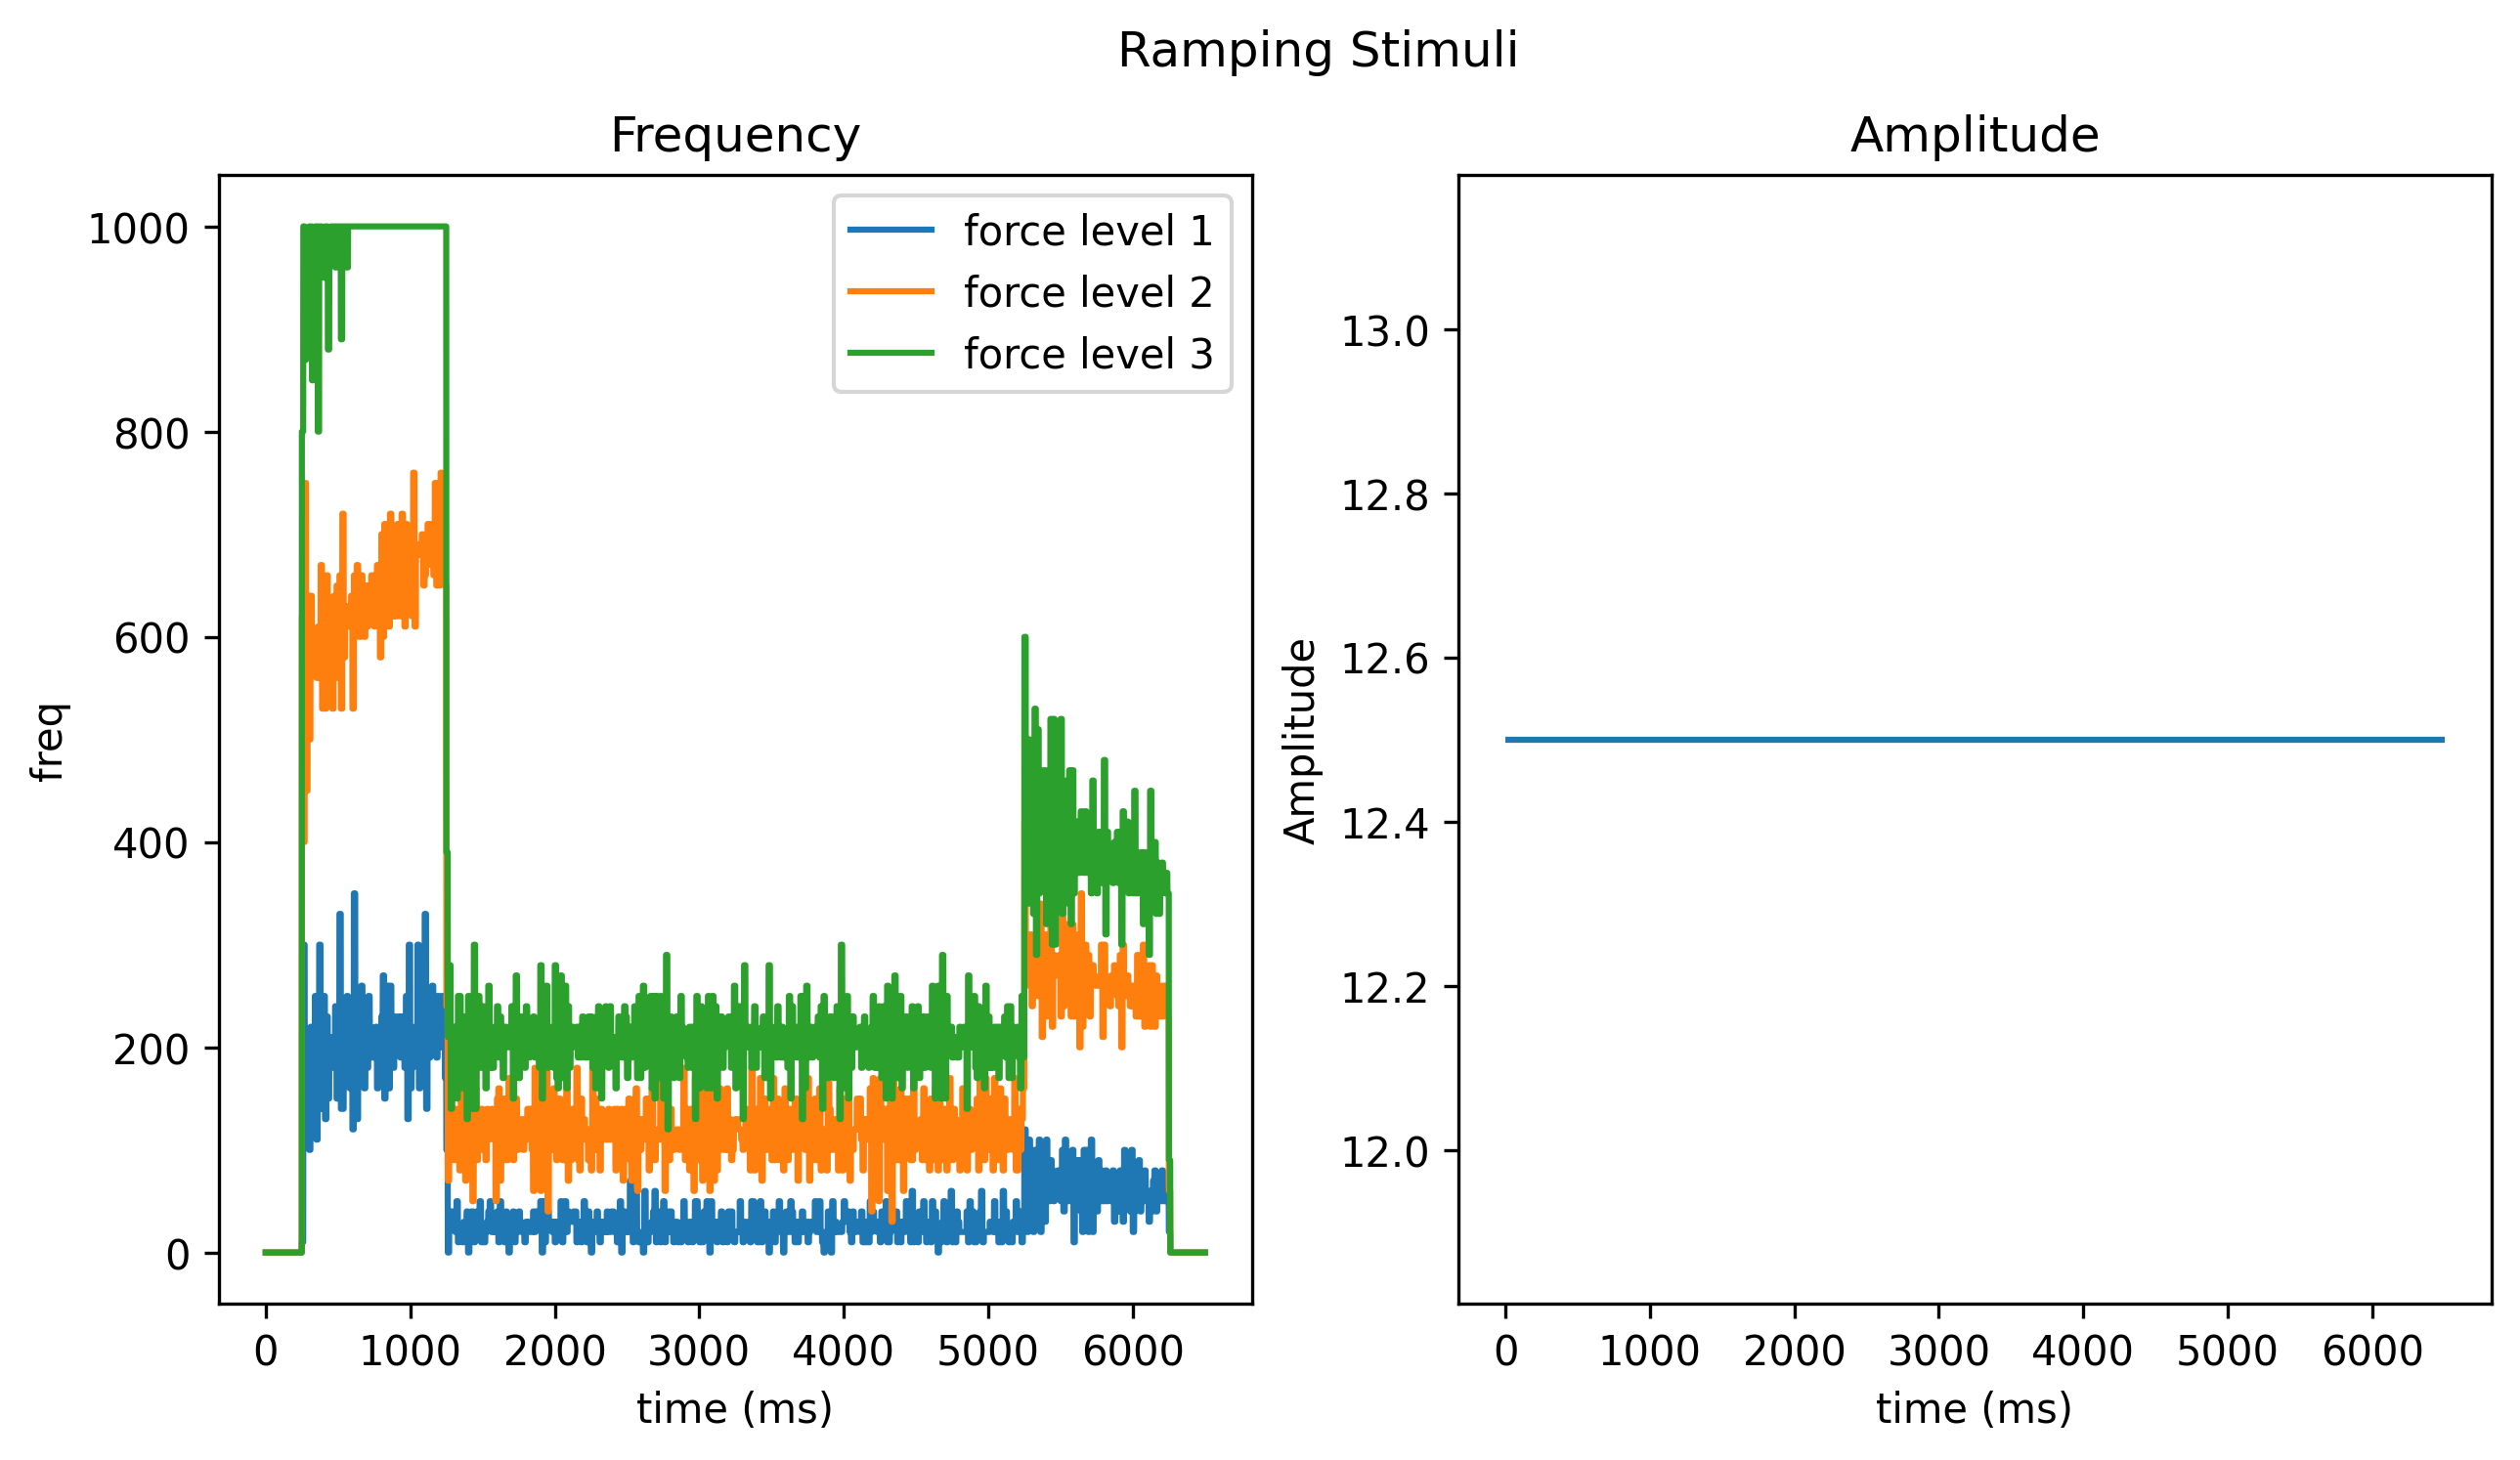

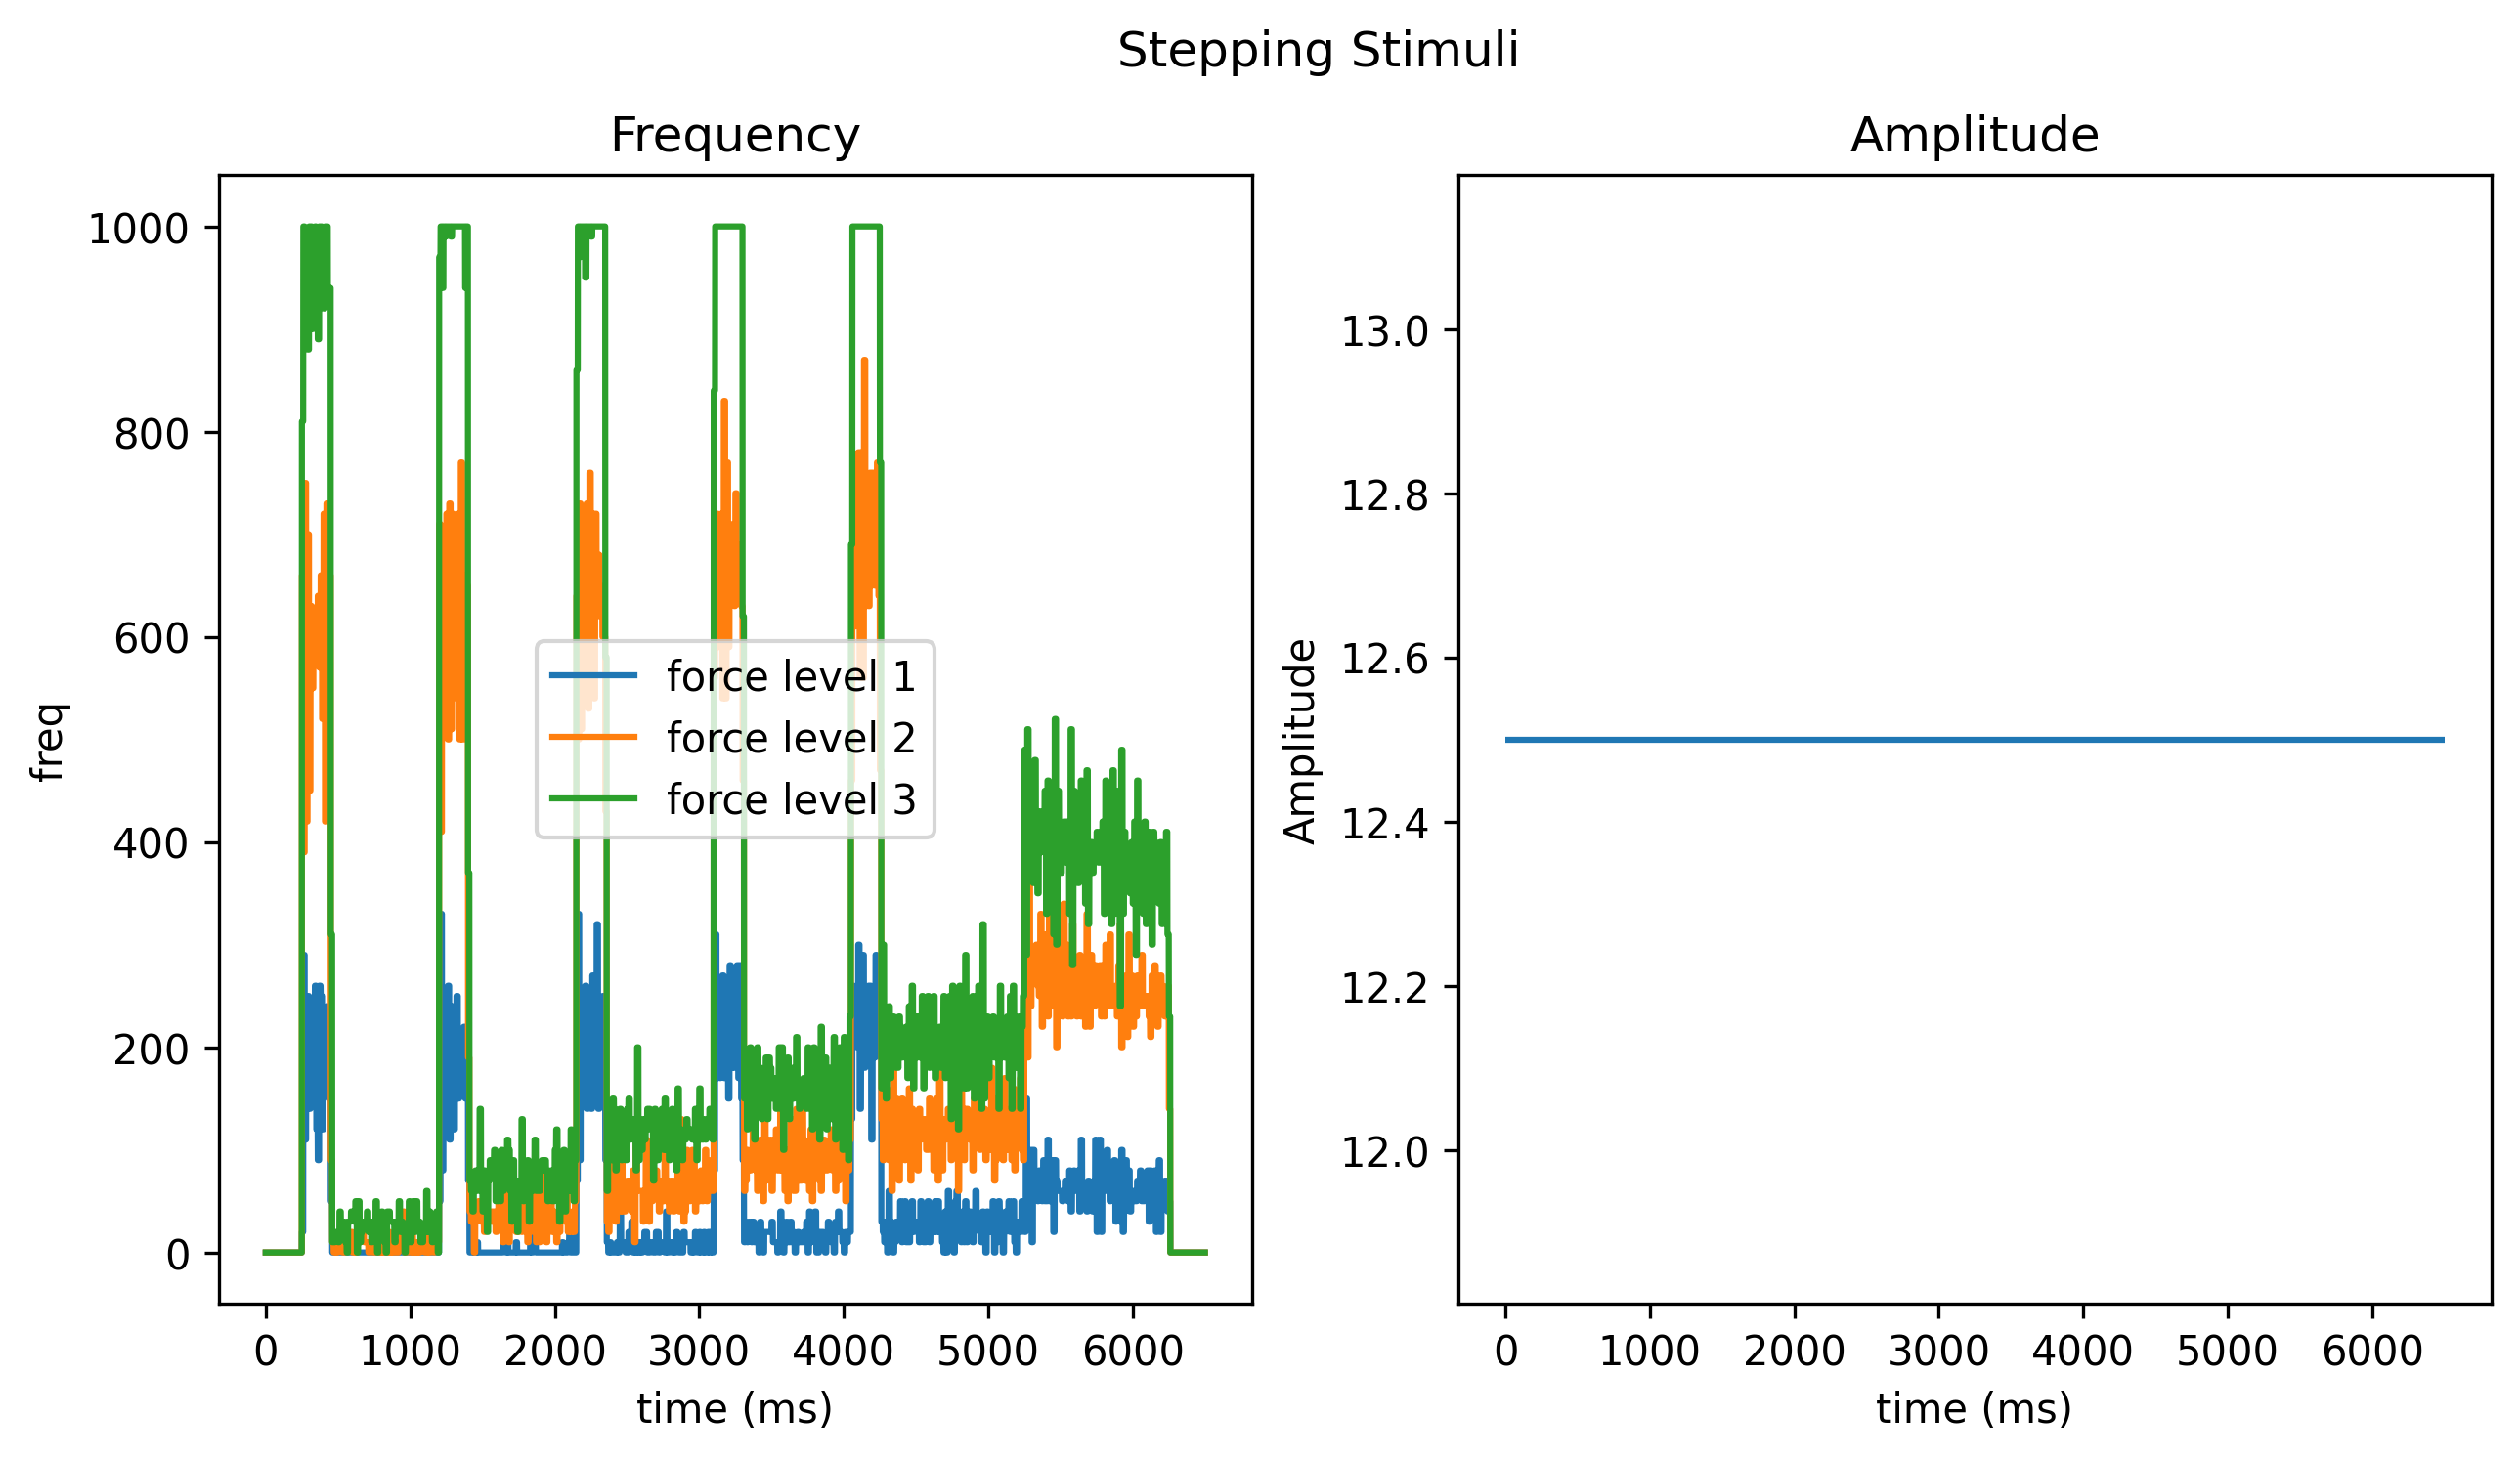

In [15]:

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(F1.T):
    ax[0].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

ax[0].legend()
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

ax[1].hlines(A_fixed, xmin = 0, xmax = 6500)
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("Amplitude")

fig.suptitle("Ramping Stimuli")

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(F2.T):
    ax[0].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

ax[0].legend()
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

ax[1].hlines(A_fixed, xmin = 0, xmax = 6500)
ax[1].set_title("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlabel("time (ms)")

fig.suptitle("Stepping Stimuli")

plt.show()

## Encoding model 3 - HNM-1 
- use **ANM for amplitude** $A$ and **FNM for freq** $F$

In [20]:
A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000




A1 = np.zeros([3, 6500]) 
A2 = np.zeros([3, 6500])

# F is fixed at 50 Hz, so I'll bin (take the mean) of every 20 ms in Stim
chunk_size = 20
Stim1_aux = Stim1.reshape(3, -1, chunk_size)
Stim1_binned = np.mean(Stim1_aux, axis=2)


Stim2_aux = Stim2.reshape(3, -1, chunk_size)
Stim2_binned = np.mean(Stim2_aux, axis=2)
s1_15 = (np.max(Stim1_binned) - np.min(Stim1_binned)) * (15/100)
s2_15 = (np.max(Stim2_binned) - np.min(Stim2_binned))* (15/100)

s1_75 = (np.amax(Stim1_binned) - np.min(Stim1_binned)) * (75/100)
s2_75 = (np.amax(Stim2_binned) - np.min(Stim2_binned))* (75/100)

A1_binned = np.copy(Stim1_binned)
A1_binned = np.where(A1_binned > s1_75, A_max, np.where(A1_binned < s1_15, 0, A_min + (A_max - A_min) * ((A1_binned - s1_15) / (s1_75 - s1_15))))
A2_binned = np.copy(Stim2_binned)
A2_binned = np.where(A2_binned > s2_75, A_max, np.where(A2_binned < s2_15, 0, A_min + (A_max - A_min) * ((A2_binned - s2_15) / (s2_75 - s2_15))))

print("Stim binned shape = ", np.shape(Stim1_binned), "it should be ", (3, 6500/20))
print("A1_binned shape: ", np.shape(A1_binned), "it should be (3, 325)")

repeat_factor = 20

# A1_aux = A1_binned[:, :, np.newaxis]
A1 = np.repeat(A1_binned, repeat_factor, axis=1)

# A2_aux = A2_binned[:, :, np.newaxis]
A2 = np.repeat(A2_binned, repeat_factor, axis=1)

print("A1 final shape: ", np.shape(A1), "it should be (3, 6500)")



Stim binned shape =  (3, 325) it should be  (3, 325.0)
A1_binned shape:  (3, 325) it should be (3, 325)
A1 final shape:  (3, 6500) it should be (3, 6500)


In [21]:
A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000

# A_fixed = np.mean([A_min, A_max])
# print("A_fixed: ", A_fixed)

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

print(np.shape(RA_Spikes1))

RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")
# summing mechanoreceptor types

R1 = np.sum(np.array([ RA_population1,  SA_population1 ] ), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ] ), axis=0)

print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")




bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")

F1_binned = np.copy(R1_binned)
F1_binned =  F1_binned   # transforming spikes per 10 ms bin into Hz
F1_binned = np.where(F1_binned > R_max, F_max,  F_min + (F_max - F_min) * (R1_binned/R_max))

print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

repeat_factor = 10   
F1 = np.repeat(F1_binned, repeat_factor, axis=0)



F2_binned = np.copy(R2_binned)
F2_binned =  F2_binned   # transforming spikes per 10 ms bin into Hz
F2_binned = np.where(F2_binned > R_max, F_max,  F_min + (F_max - F_min) * (R2_binned/R_max))

print("F2_binned shape: ", np.shape(F2_binned), "should be (650, 3)")

repeat_factor = 10   
F2 = np.repeat(F2_binned, repeat_factor, axis=0)


(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)
F1_binned shape:  (650, 3) should be (650, 3)
F2_binned shape:  (650, 3) should be (650, 3)


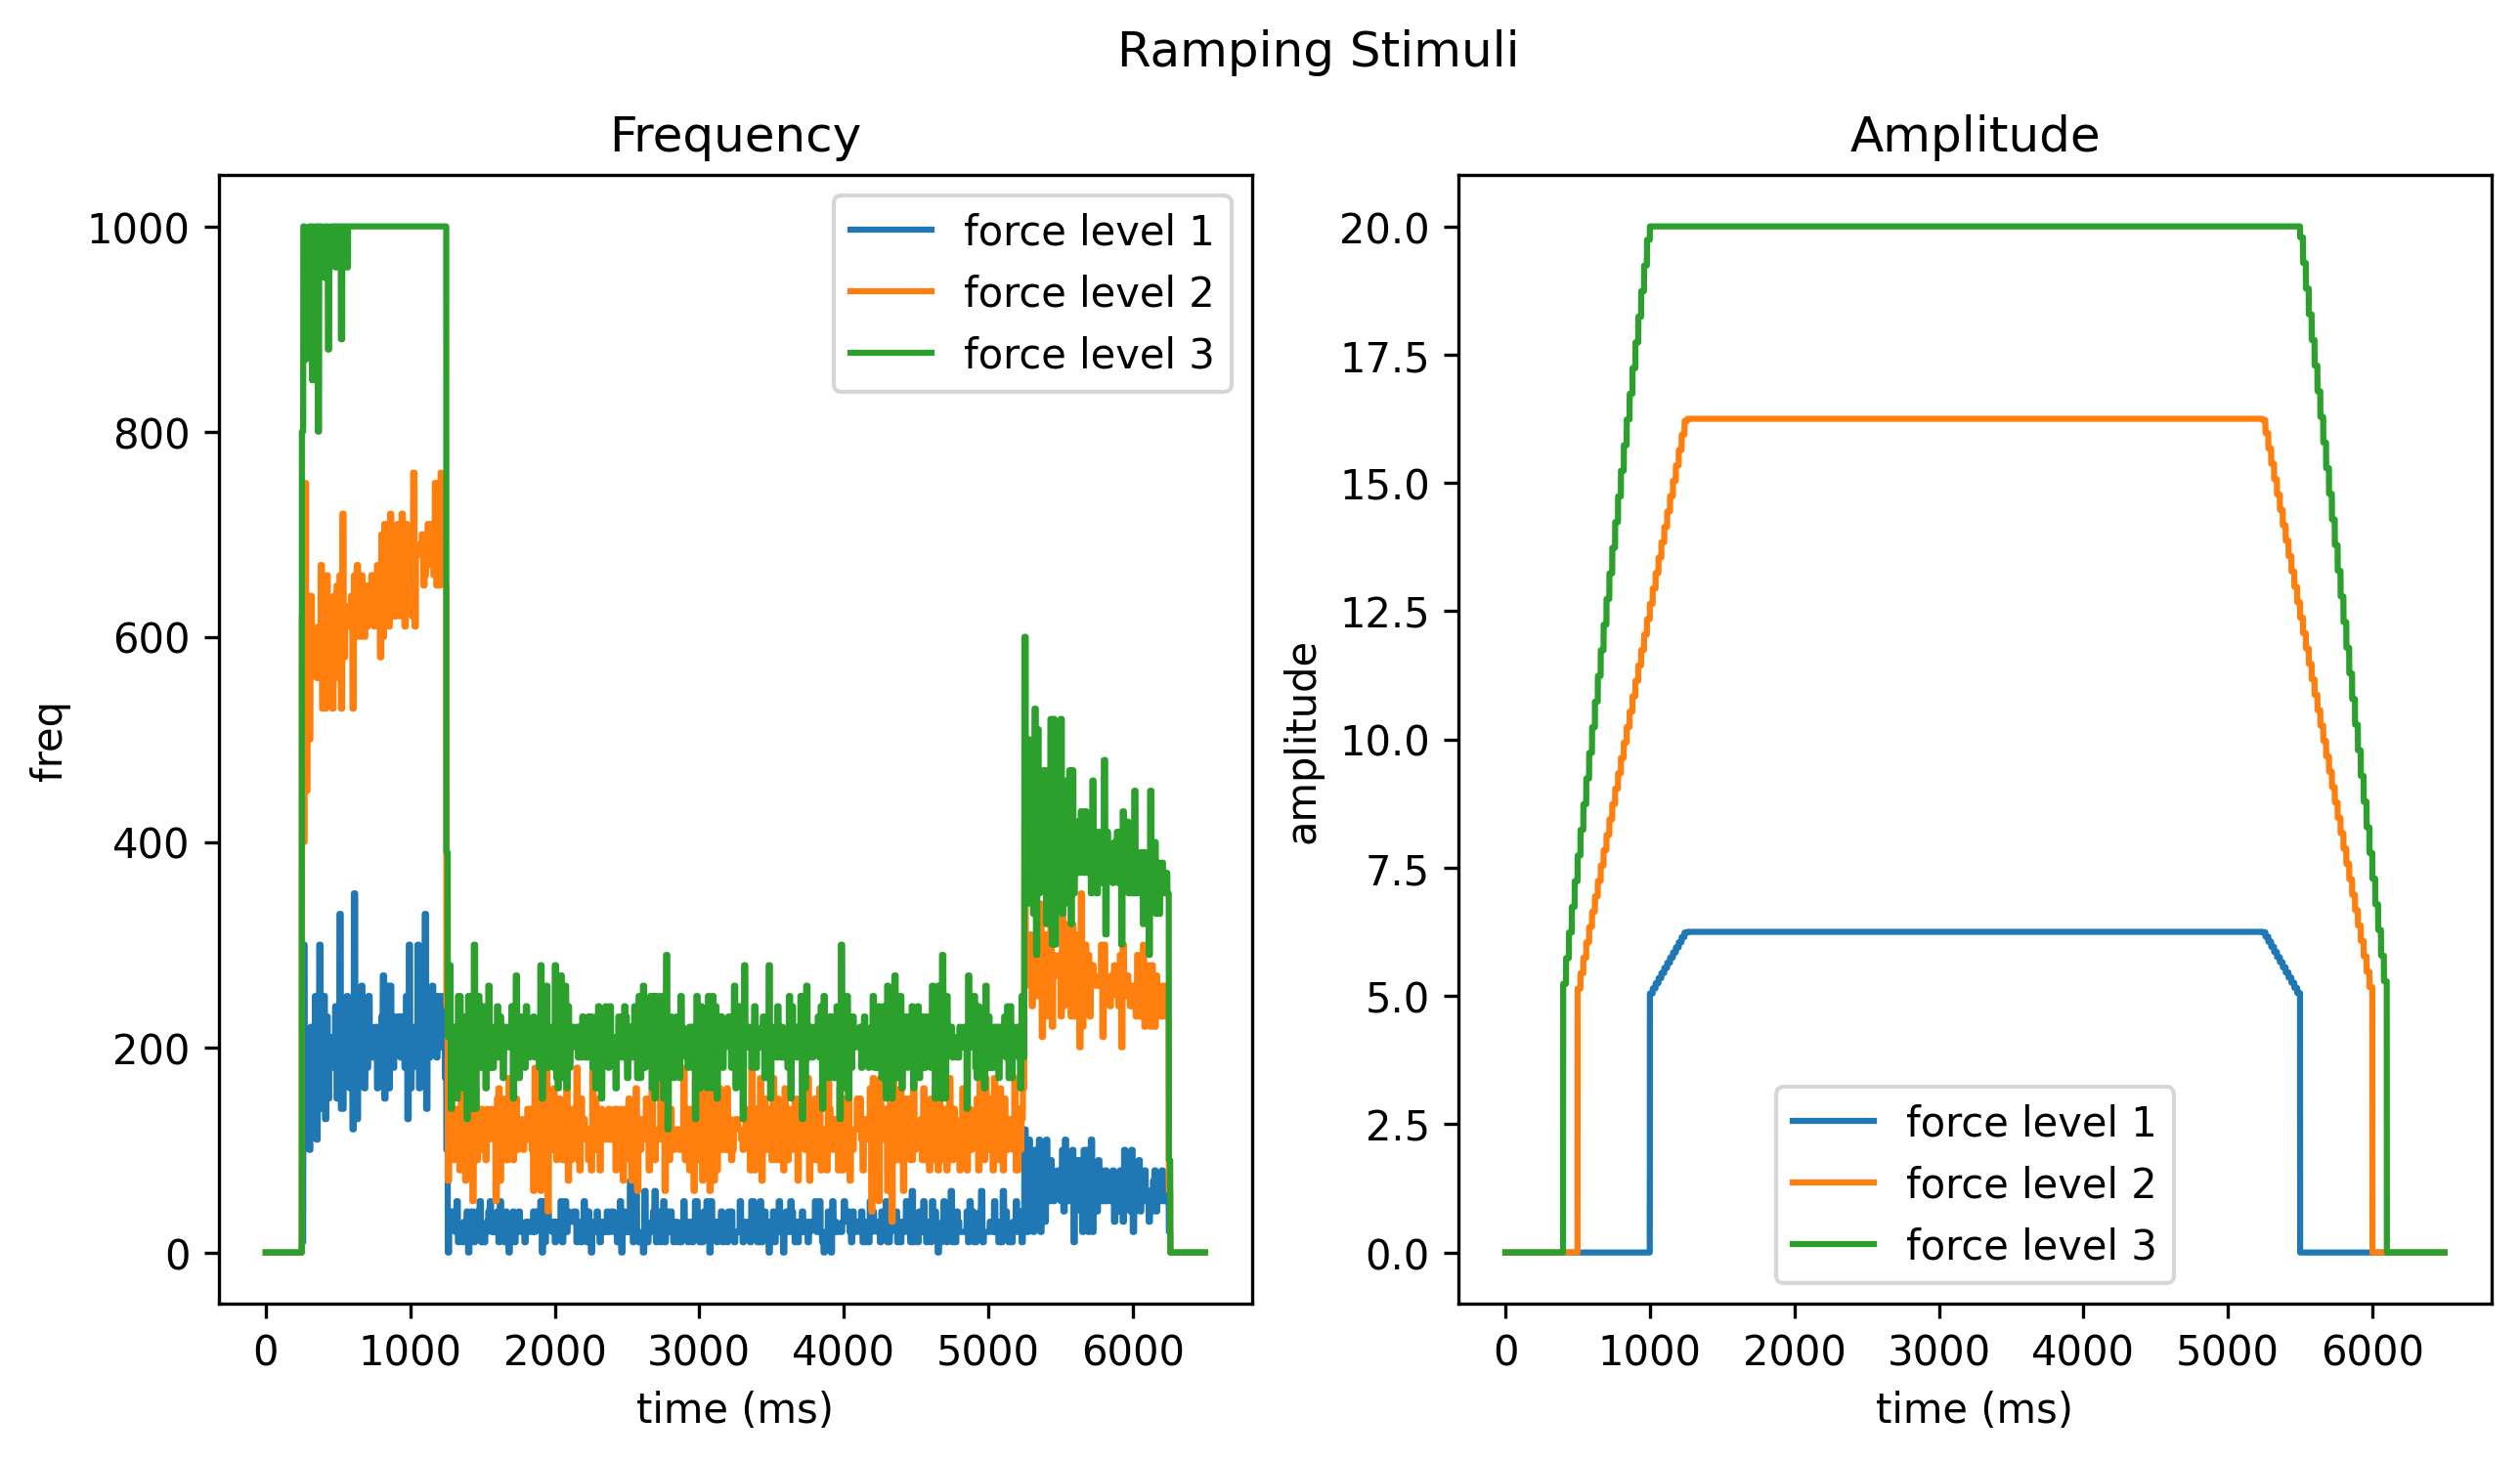

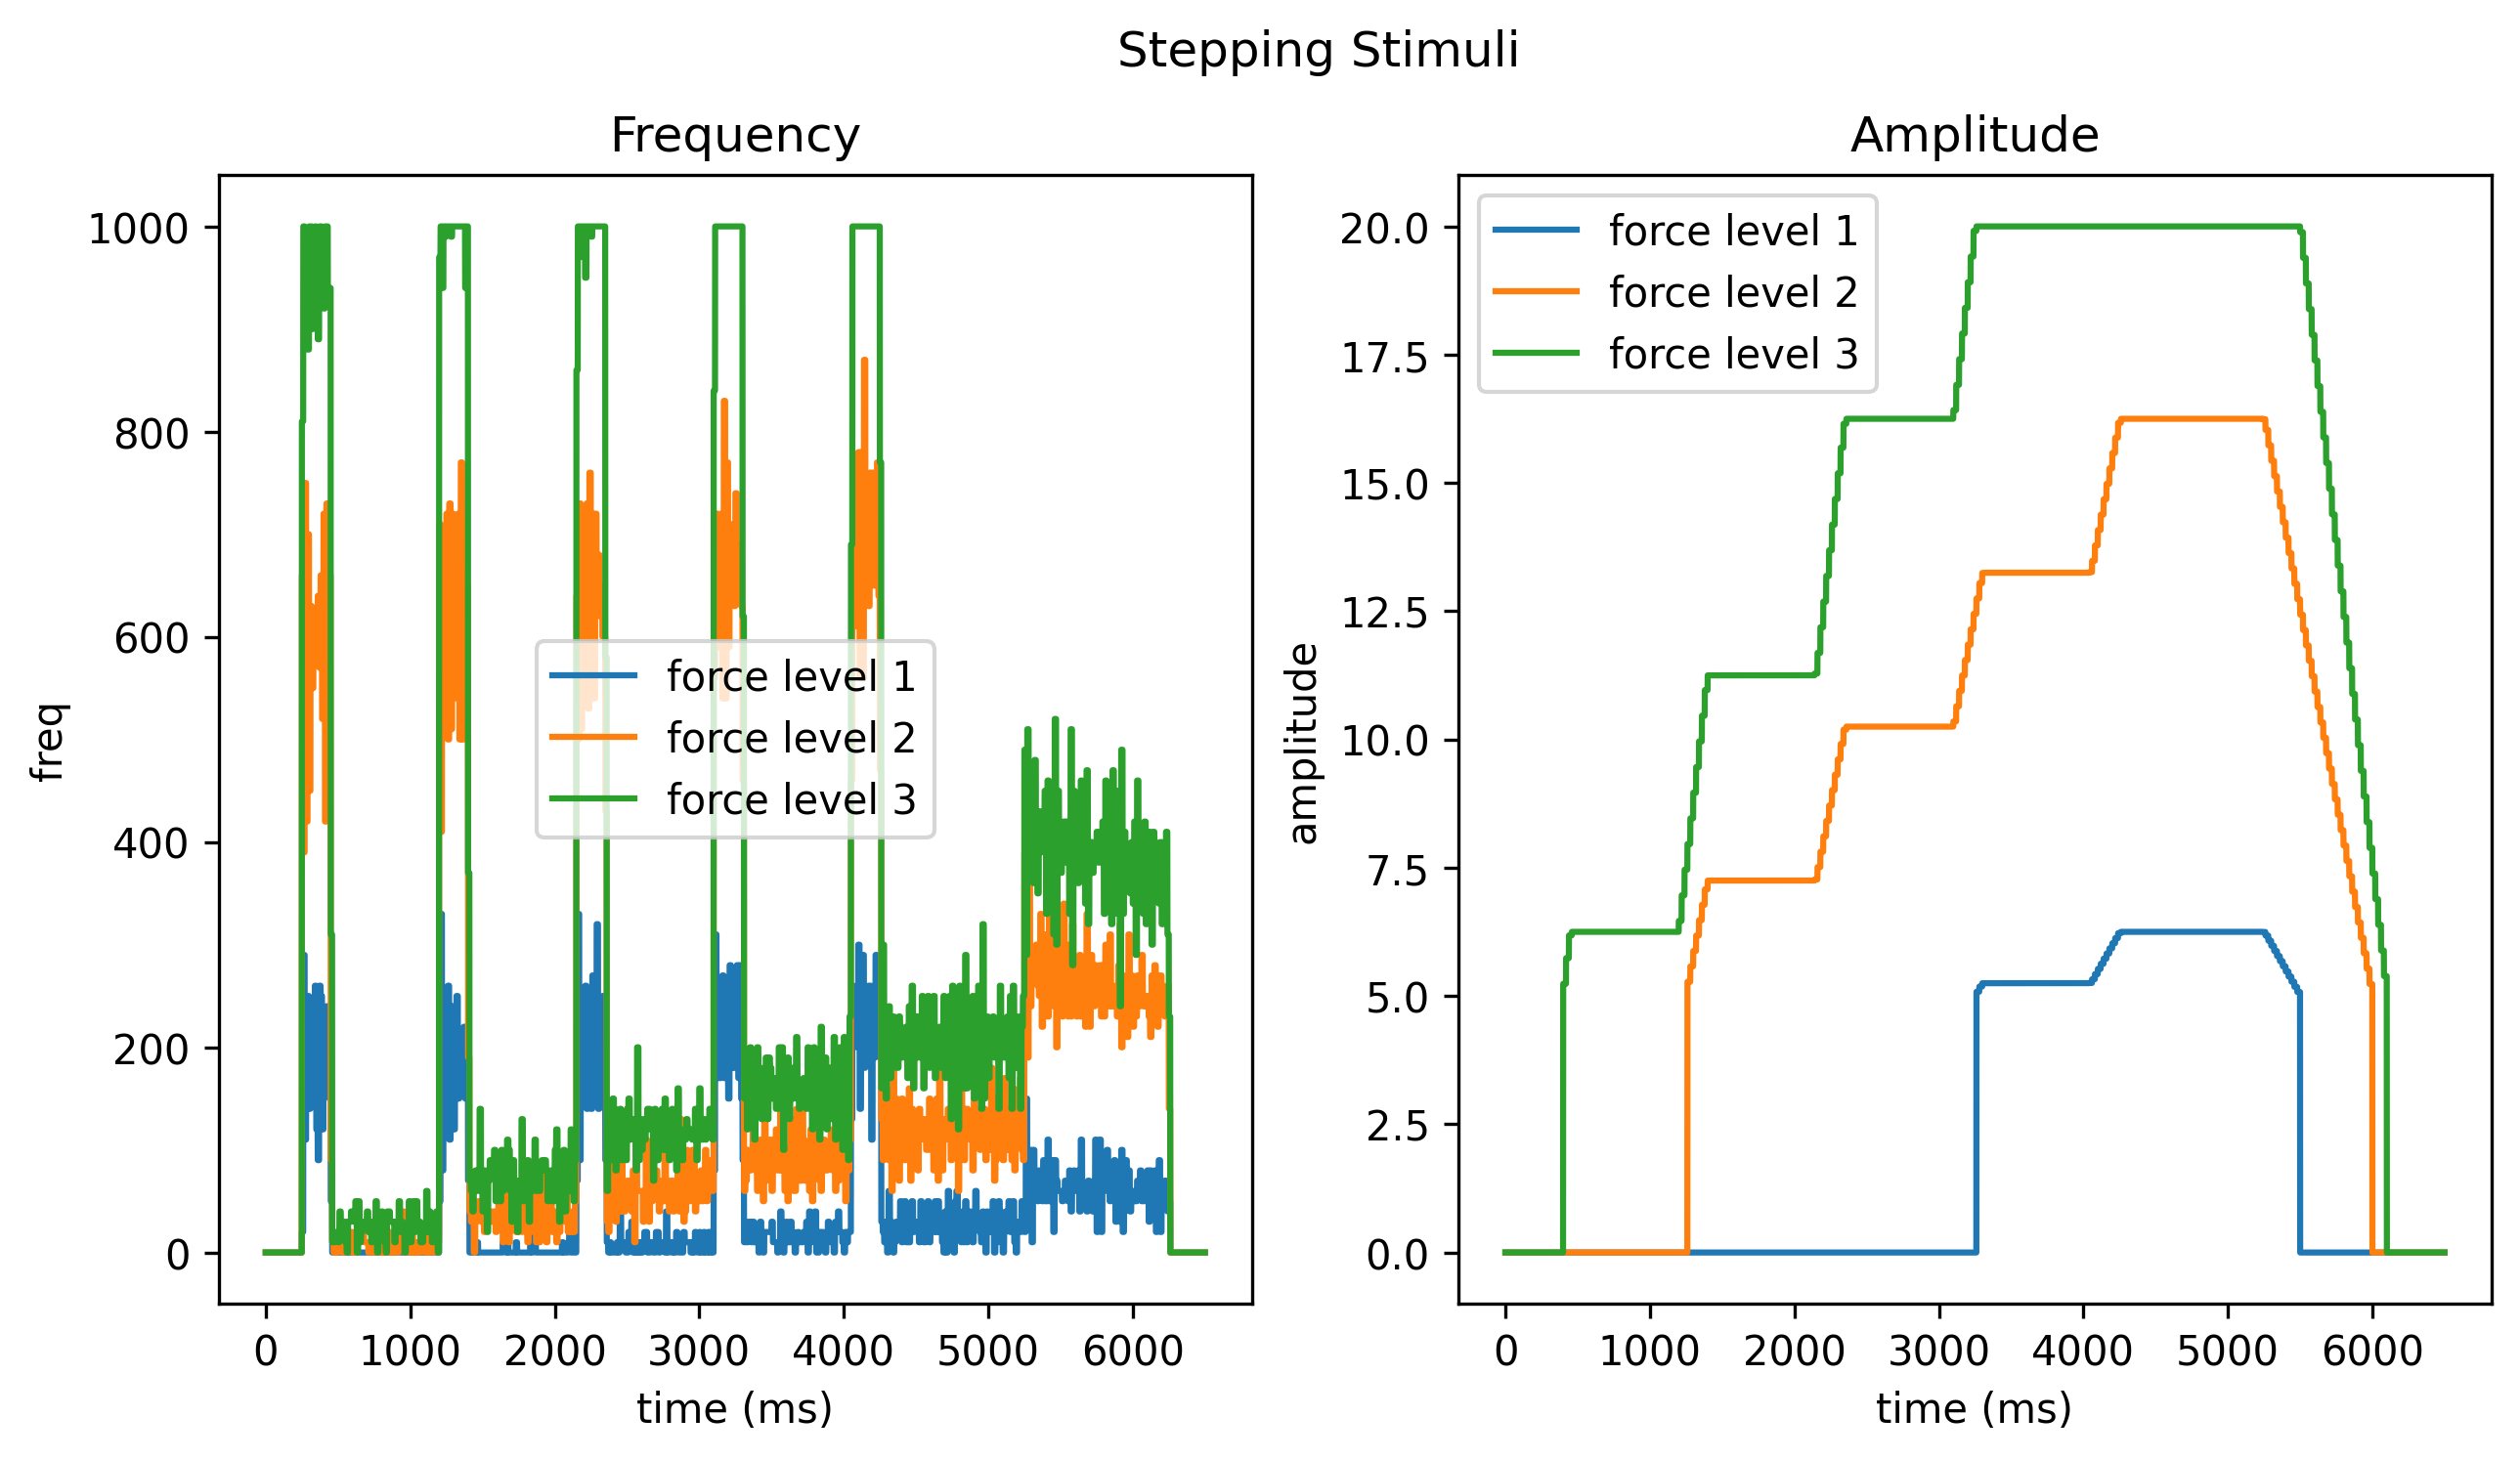

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A1):
    ax[1].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

for i, force_level in enumerate(F1.T):
    ax[0].plot(range(len(force_level)), force_level, label = f"force level {i+1}")


ax[1].legend()
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].legend()
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

fig.suptitle("Ramping Stimuli")

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A2):
    ax[1].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

for i, force_level in enumerate(F2.T):
    ax[0].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

ax[1].legend()
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].legend()
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

fig.suptitle("Stepping Stimuli")


plt.show()

## Encoding model 4 - HNM-2

- the pulse frequency 𝐹 is determined using FNM 
- the current amplitude 𝐴 is based on the number of activated nerve fibers
$$A= A_{min} + (A_{max}-A_{min}) (\frac{N_{act}}{N_{total}})$$
- $N_{act}$ - the number of activated mechanoreceptors within the current bin
- $N_{total}$ - the number of mechanoreceptors in the entire population.


N_total =  50 , should be 50
(50, 6500, 3)
how do the values look? binary or also with amplitude?
yes, binary spikes indeed; in this case sum() also works, not only count()
population activity shape:  (6500, 3) should be (6500, 3)
shape R1_binned / N_total: (650, 3) should be(650, 3)
shape A1_binned  (650, 3) should be (650, 3)
A1 final shape:  (6500, 3) it should be (6500, 3)


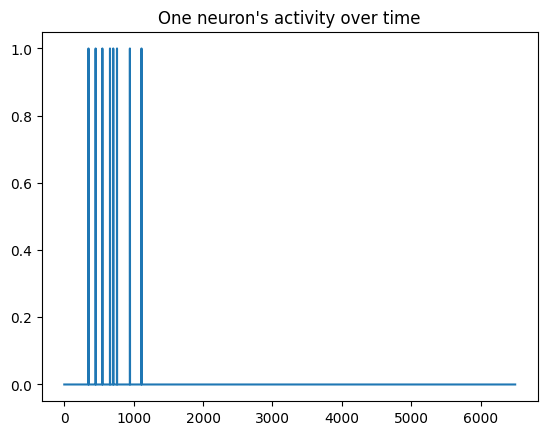

In [23]:
A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000


RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

N_total = len(RA_Spikes1[:, 0, 0])
print("N_total = ", N_total, ", should be 50")

print(np.shape(RA_Spikes1))

print("how do the values look? binary or also with amplitude?")
plt.plot(range(len(RA_Spikes1[0, :, 0])), RA_Spikes1[0, :, 0])
plt.title("One neuron's activity over time")

print("yes, binary spikes indeed; in this case sum() also works, not only count()")
# summing mechanoreceptor types 
RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")

# summming mechanoreceptors over axis the neuroan axis
    # we care only about the neuron activation count in a bin
R1 = np.sum(np.array([ RA_population1,  SA_population1 ] ), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ] ), axis=0)

bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


# s1_15 = np.max(Stim1_binned) * (15/100)
# s2_15 = np.max(Stim2_binned)* (15/100)

# s1_75 = np.amax(Stim1_binned) * (75/100)
# s2_75 = np.amax(Stim2_binned)* (75/100)

# N_act is equivalent to R_binned
A1_binned = A_min + (A_max- A_min) * (R1_binned / N_total)
A2_binned = A_min + (A_max- A_min) * (R2_binned / N_total)



print("shape R1_binned / N_total:", np.shape(R1_binned / N_total), "should be(650, 3)")
print("shape A1_binned ", np.shape(A1_binned), "should be (650, 3)")

repeat_factor = 10
# A1_aux = A1_binned[:, :, np.newaxis]
A1 = np.repeat(A1_binned, repeat_factor, axis=0)

# A2_aux = A2_binned[:, :, np.newaxis]
A2 = np.repeat(A2_binned, repeat_factor, axis=0)

print("A1 final shape: ", np.shape(A1), "it should be (6500, 3)")





In [24]:
A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000

# A_fixed = np.mean([A_min, A_max])
# print("A_fixed: ", A_fixed)

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

print(np.shape(RA_Spikes1))

RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")
# summing mechanoreceptor types

R1 = np.sum(np.array([ RA_population1,  SA_population1 ] ), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ] ), axis=0)

print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")


bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")

# F1_binned = F_min + (F_max - F_min) * (R1_binned/R_max)
# F1_binned = 100 * F1_binned   # transforming spikes per 10 ms bin into Hz
# print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

# # putting F1 in original shape
# repeat_factor = 10   
# # A1_aux = A1_binned[:, :, np.newaxis]
# F1 = np.repeat(F1_binned, repeat_factor, axis=0)

# print("F1 shape: ", np.shape(F1), "should be (6500, 3)")

# F2 = F_min + (F_max - F_min) * (R2_binned/R_max)
# F2 = 100 * F2   # transforming spikes per 10 ms bin into Hz
# F2 = np.repeat(F2, repeat_factor, axis=0)


F1_binned = np.copy(R1_binned)
F1_binned =  F1_binned   # transforming spikes per 10 ms bin into Hz
F1_binned = np.where(F1_binned > R_max, F_max,  F_min + (F_max - F_min) * (R1_binned/R_max))

print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

repeat_factor = 10   
F1 = np.repeat(F1_binned, repeat_factor, axis=0)



F2_binned = np.copy(R2_binned)
F2_binned =  F2_binned   # transforming spikes per 10 ms bin into Hz
F2_binned = np.where(F2_binned > R_max, F_max,  F_min + (F_max - F_min) * (R2_binned/R_max))

print("F2_binned shape: ", np.shape(F2_binned), "should be (650, 3)")

repeat_factor = 10   
F2 = np.repeat(F2_binned, repeat_factor, axis=0)



(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)
F1_binned shape:  (650, 3) should be (650, 3)
F2_binned shape:  (650, 3) should be (650, 3)


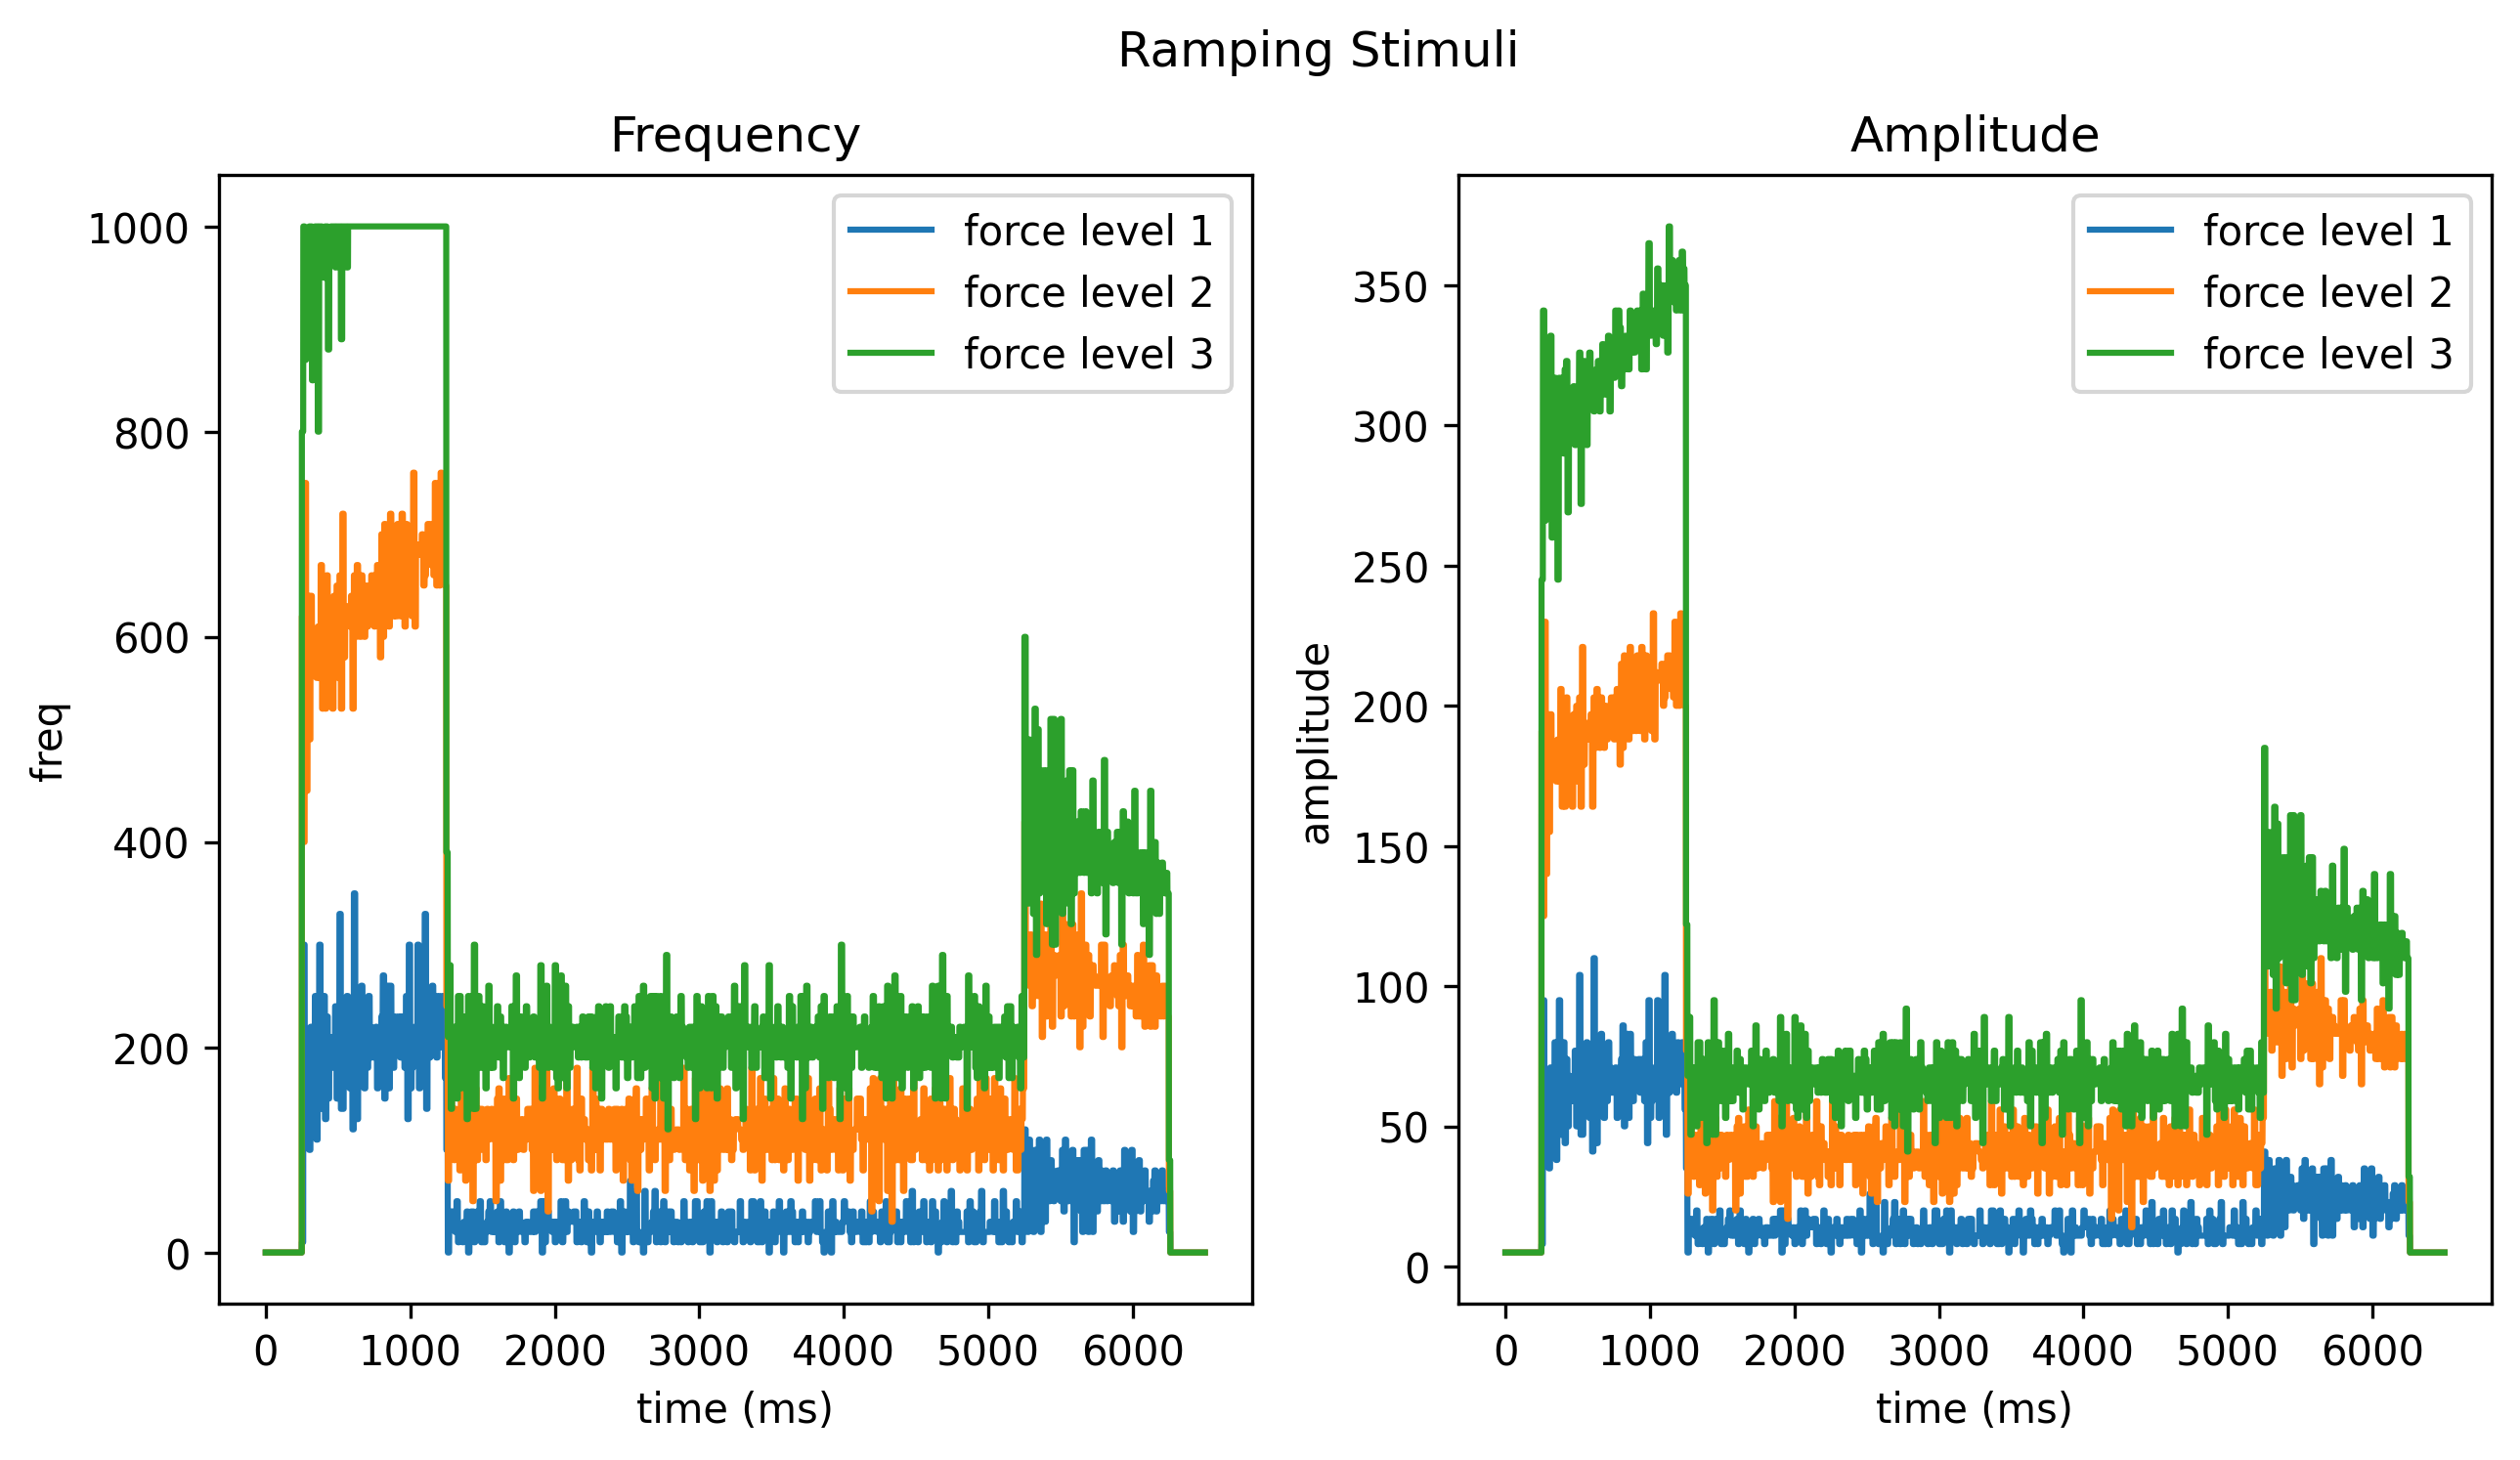

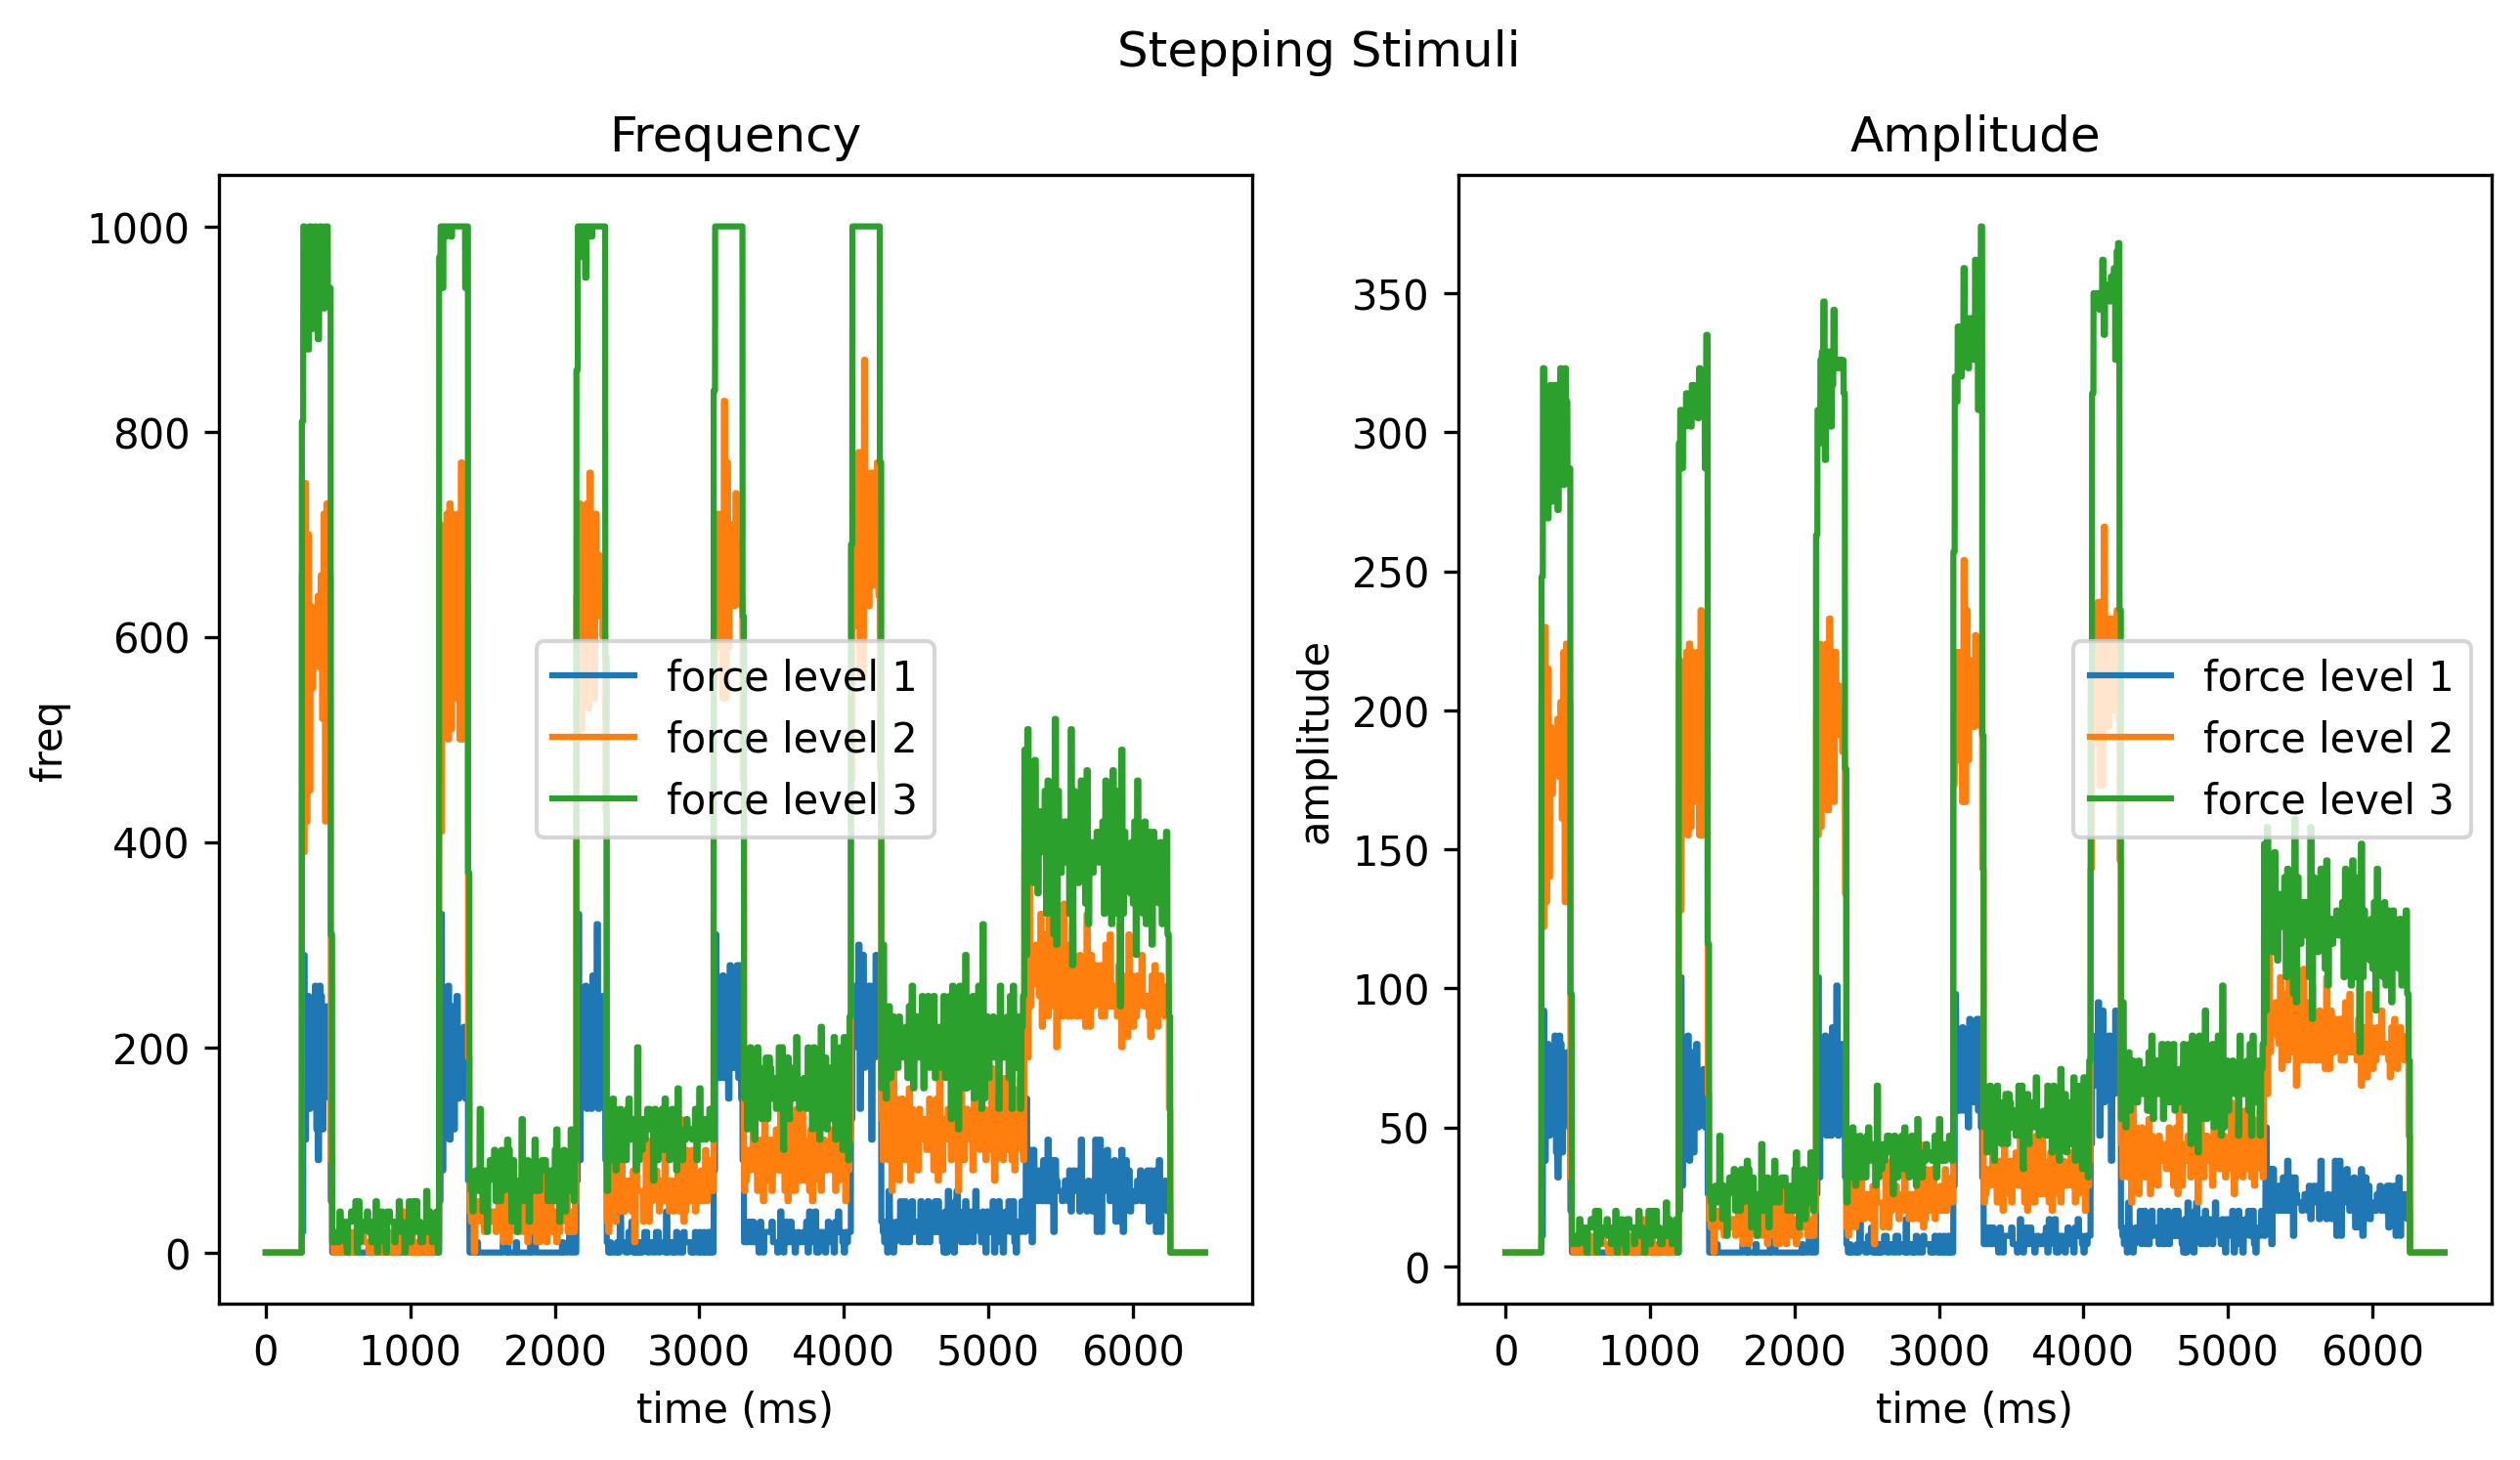

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A1.T):
    ax[1].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

for i, force_level in enumerate(F1.T):
    ax[0].plot(range(len(force_level)), force_level, label = f"force level {i+1}")


ax[1].legend()
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].legend()
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

fig.suptitle("Ramping Stimuli")

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A2.T):
    ax[1].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

for i, force_level in enumerate(F2.T):
    ax[0].plot(range(len(force_level)), force_level, label = f"force level {i+1}")

ax[1].legend()
ax[1].set_title("Amplitude")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].legend()
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

fig.suptitle("Stepping Stimuli")

plt.show()

# Question 3

For each of the four encoding models explain in a few sentences how the stimu-
lation amplitude and pulse frequencies encode the static and dynamic aspects of the stimulus.

- for ANM, both dynamic and static information are encodeded in the *amplitude* of the stimulation, with a fixed frequency; The static aspect (e.g., pressure) is encoded in the magnitude of the amplitude - higher pressure results in higher stimulation amplitude and vice versa. The dynamic aspect (e.g., a *change* in pressure) is encoded in the *rate of change* of the amplitude - faster increases in the pressure of the stimulus result in faster increases in stimulation and then perception of the stimulus.
- for FNM, both dynamic and static information are encodeded in the *frequency* of the stimulation, with a fixed amplitude; The steep peaks in stimulation frequency encode a change in stimulus and the baseline frequency of spikes encodes static information about the stimulation (as seen in the linear increase of the increase of stimulation frequency between the peaks in the FNM plot for stepping stimuli) 
- HNM-1 couples the encoding shemes of ANM and FNM such that dynamic and static information about the stimulus are encoded *both in the amplitude and frequency of the stimulation*. How these are encoded in the two mediums is described above.
- HNM-2 extends the encoding scheme of FNM, such that the static and dynamic aspects of the stimulus are also encoded in the *amplitude* of the stimulus; This way, for each time bin the amplitude of the stimulation is scaled by the ratio of active simulated mechanoreceptors. The static and dynamic information is still endoded as described above in the FNM secttion, but now the same holds also for the amplitude medium.

# Question 4

Let’s explore how the stimulation parameters are affected by the choice of parameter ranges during encoding. We will focus on the encoding of the **stepping stimuli** (**high
force value**) by ANM and FNM.

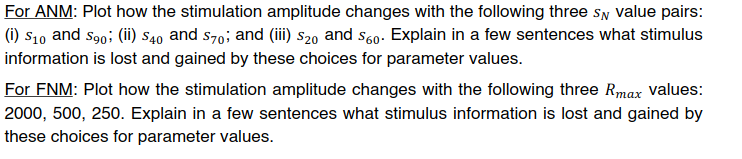

### ANM parameter variation

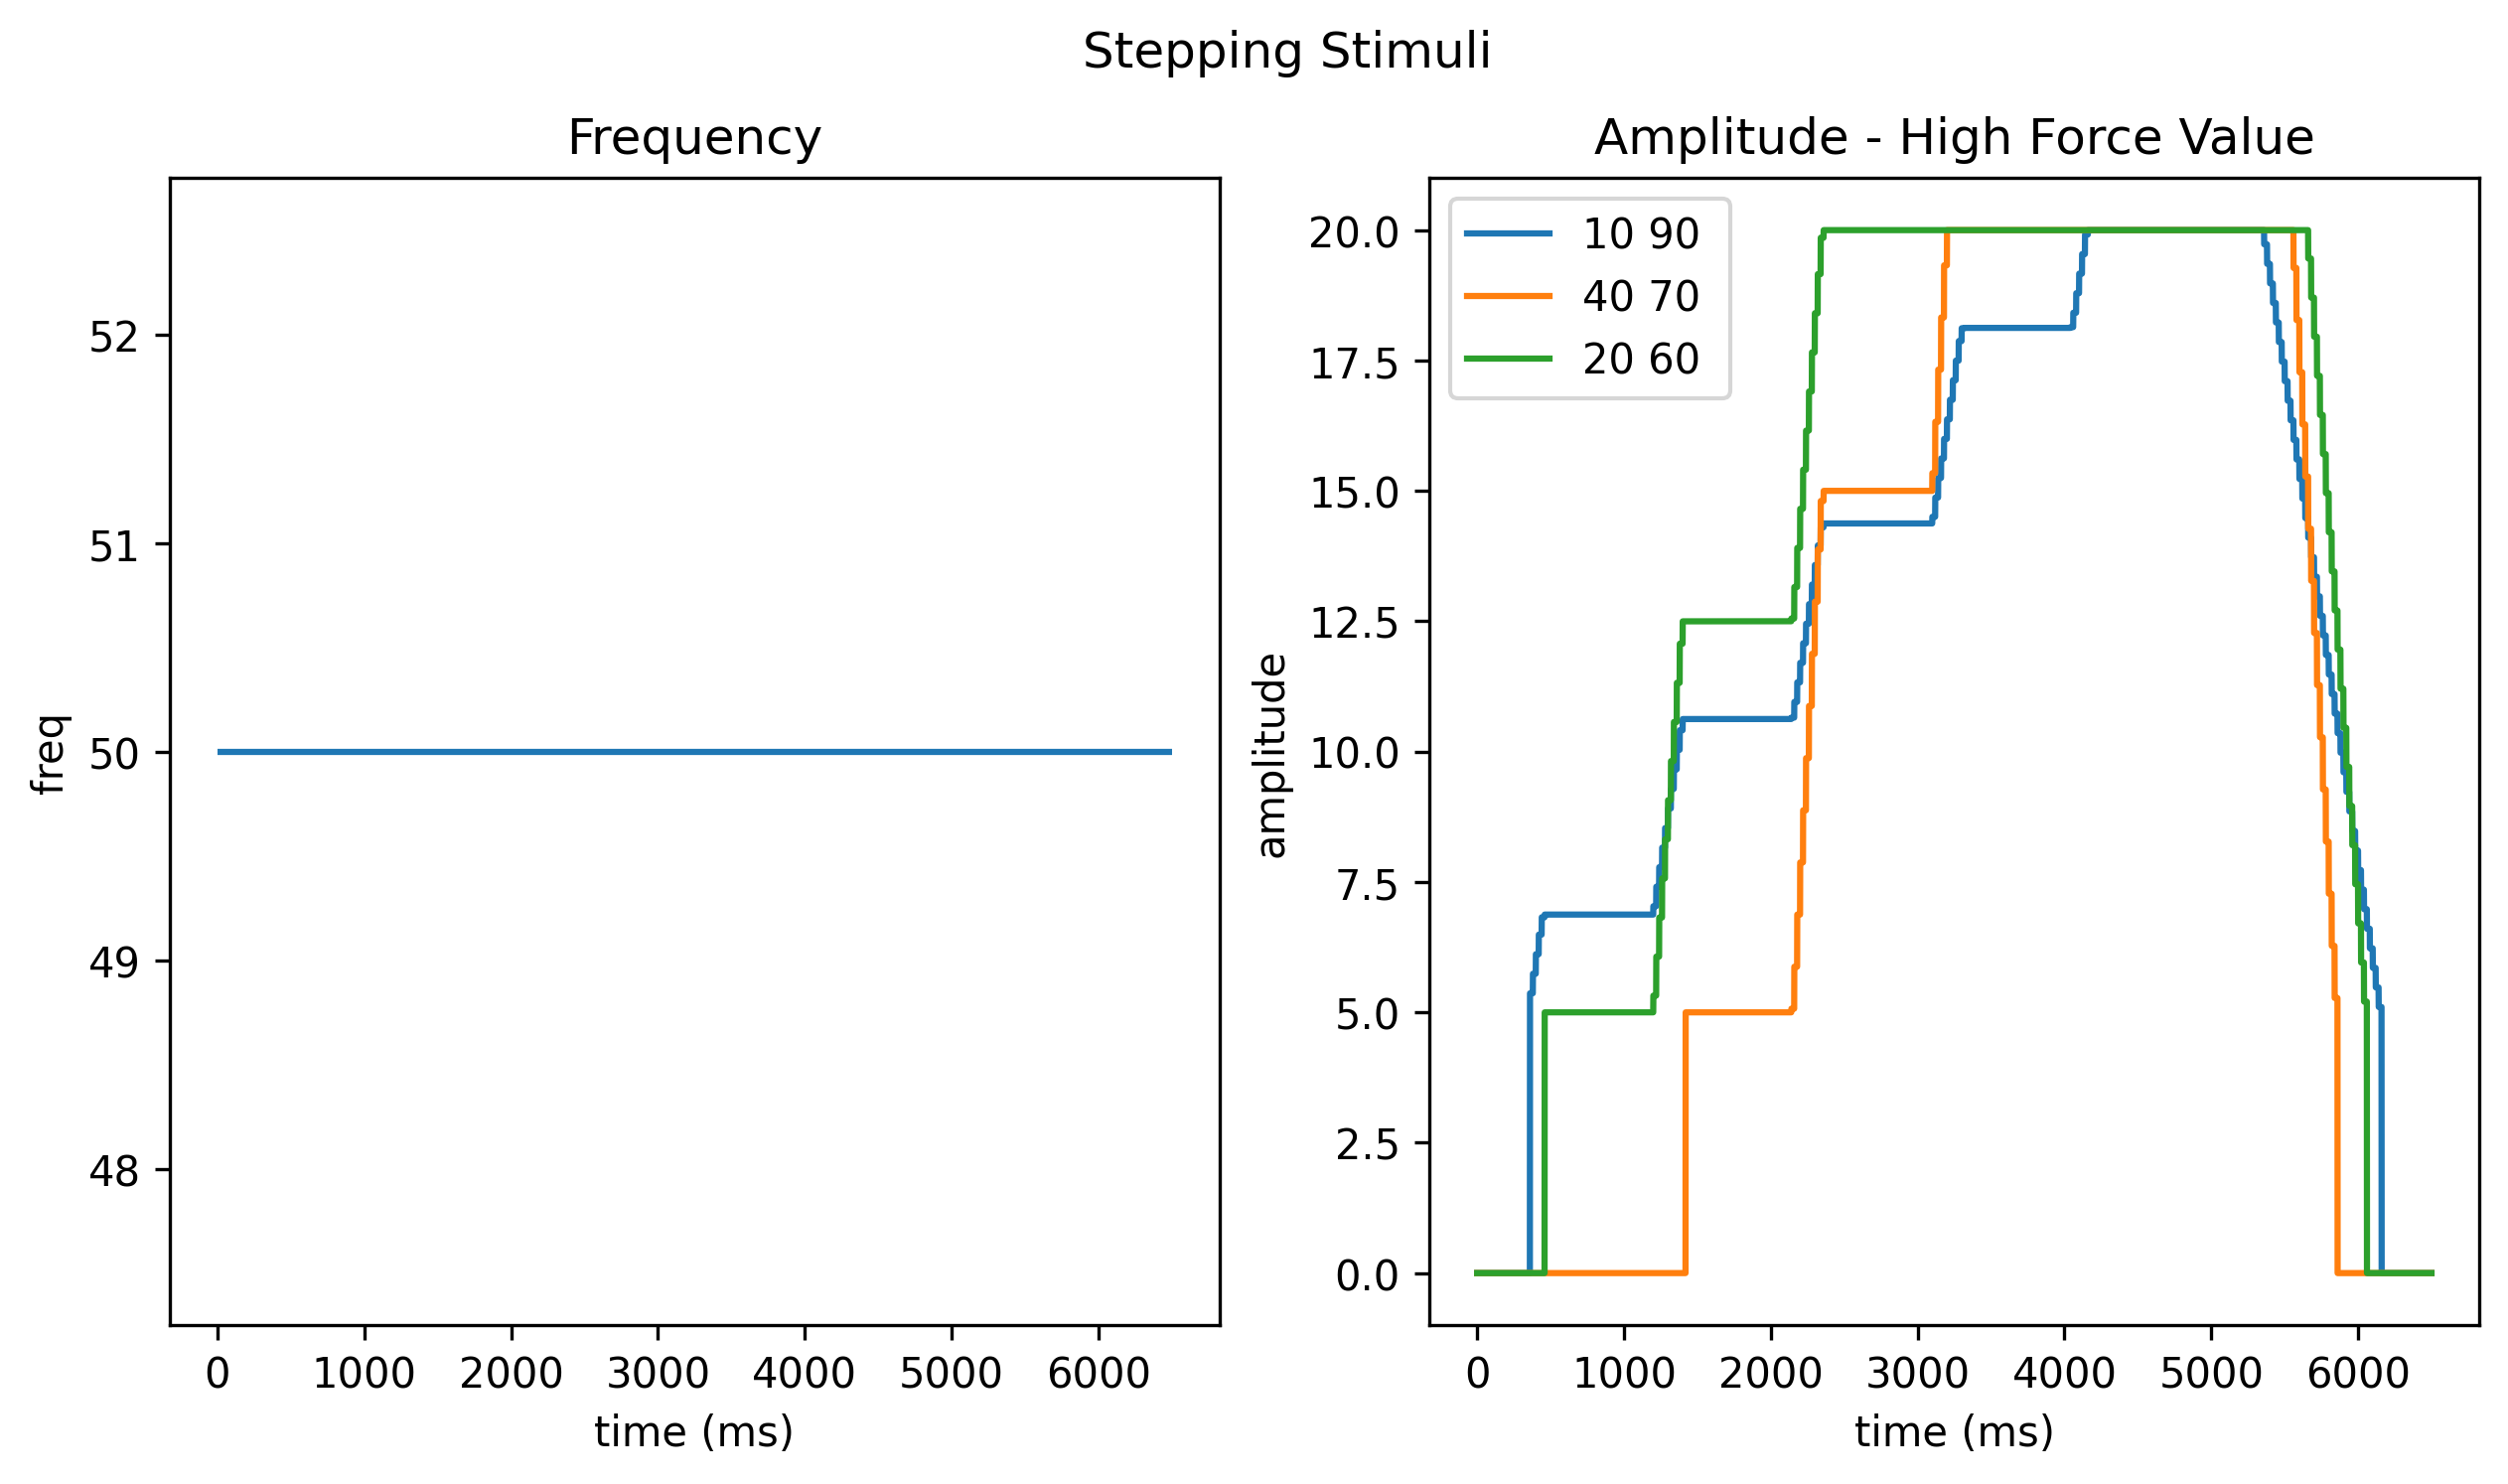

In [28]:
A_min = 5
A_max = 20
F_min = 0
F_max = 1000
R_max = 1000

A1 = np.zeros([3, 6500]) 
A2 = np.zeros([3, 6500])

# F is fixed at 50 Hz, so I'll bin (take the mean) of every 20 ms in Stim
chunk_size = 20
Stim1_aux = Stim1.reshape(3, -1, chunk_size)
Stim1_binned = np.mean(Stim1_aux, axis=2)


Stim2_aux = Stim2.reshape(3, -1, chunk_size)
Stim2_binned = np.mean(Stim2_aux, axis=2)
s1_15 = (np.max(Stim1_binned) - np.min(Stim1_binned)) * (10/100)
s2_15 = (np.max(Stim2_binned) - np.min(Stim2_binned))* (10/100)

s1_75 = (np.amax(Stim1_binned) - np.min(Stim1_binned)) * (90/100)
s2_75 = (np.amax(Stim2_binned) - np.min(Stim2_binned))* (90/100)

A1_binned = np.copy(Stim1_binned)
A1_binned = np.where(A1_binned > s1_75, A_max, np.where(A1_binned < s1_15, 0, A_min + (A_max - A_min) * ((A1_binned - s1_15) / (s1_75 - s1_15))))
A2_binned = np.copy(Stim2_binned)
A2_binned = np.where(A2_binned > s2_75, A_max, np.where(A2_binned < s2_15, 0, A_min + (A_max - A_min) * ((A2_binned - s2_15) / (s2_75 - s2_15))))

repeat_factor = 20

# A1_aux = A1_binned[:, :, np.newaxis]
A1_firstPair = np.repeat(A1_binned, repeat_factor, axis=1)

# A2_aux = A2_binned[:, :, np.newaxis]
A2_firstPair = np.repeat(A2_binned, repeat_factor, axis=1)


# _____________ second pair _____________-



A1 = np.zeros([3, 6500]) 
A2 = np.zeros([3, 6500])

# F is fixed at 50 Hz, so I'll bin (take the mean) of every 20 ms in Stim
chunk_size = 20
Stim1_aux = Stim1.reshape(3, -1, chunk_size)
Stim1_binned = np.mean(Stim1_aux, axis=2)


Stim2_aux = Stim2.reshape(3, -1, chunk_size)
Stim2_binned = np.mean(Stim2_aux, axis=2)
s1_15 = (np.max(Stim1_binned) - np.min(Stim1_binned)) * (40/100)
s2_15 = (np.max(Stim2_binned) - np.min(Stim2_binned))* (40/100)

s1_75 = (np.amax(Stim1_binned) - np.min(Stim1_binned)) * (70/100)
s2_75 = (np.amax(Stim2_binned) - np.min(Stim2_binned))* (70/100)

A1_binned = np.copy(Stim1_binned)
A1_binned = np.where(A1_binned > s1_75, A_max, np.where(A1_binned < s1_15, 0, A_min + (A_max - A_min) * ((A1_binned - s1_15) / (s1_75 - s1_15))))
A2_binned = np.copy(Stim2_binned)
A2_binned = np.where(A2_binned > s2_75, A_max, np.where(A2_binned < s2_15, 0, A_min + (A_max - A_min) * ((A2_binned - s2_15) / (s2_75 - s2_15))))

repeat_factor = 20

# A1_aux = A1_binned[:, :, np.newaxis]
A1_secondPair = np.repeat(A1_binned, repeat_factor, axis=1)
A2_secondPair = np.repeat(A2_binned, repeat_factor, axis=1)


# +++++++++++++++ third pair +++++++++++++++++++



A1 = np.zeros([3, 6500]) 
A2 = np.zeros([3, 6500])

# F is fixed at 50 Hz, so I'll bin (take the mean) of every 20 ms in Stim
chunk_size = 20
Stim1_aux = Stim1.reshape(3, -1, chunk_size)
Stim1_binned = np.mean(Stim1_aux, axis=2)


Stim2_aux = Stim2.reshape(3, -1, chunk_size)
Stim2_binned = np.mean(Stim2_aux, axis=2)
s1_15 = (np.max(Stim1_binned) - np.min(Stim1_binned)) * (20/100)
s2_15 = (np.max(Stim2_binned) - np.min(Stim2_binned))* (20/100)

s1_75 = (np.amax(Stim1_binned) - np.min(Stim1_binned)) * (60/100)
s2_75 = (np.amax(Stim2_binned) - np.min(Stim2_binned))* (60/100)

A1_binned = np.copy(Stim1_binned)
A1_binned = np.where(A1_binned > s1_75, A_max, np.where(A1_binned < s1_15, 0, A_min + (A_max - A_min) * ((A1_binned - s1_15) / (s1_75 - s1_15))))
A2_binned = np.copy(Stim2_binned)
A2_binned = np.where(A2_binned > s2_75, A_max, np.where(A2_binned < s2_15, 0, A_min + (A_max - A_min) * ((A2_binned - s2_15) / (s2_75 - s2_15))))

repeat_factor = 20

# A1_aux = A1_binned[:, :, np.newaxis]
A1_thirdPair = np.repeat(A1_binned, repeat_factor, axis=1)
A2_thirdPair = np.repeat(A2_binned, repeat_factor, axis=1)




#=================== plotting ===============

fig, ax = plt.subplots(nrows= 1, ncols= 2, dpi = 300, figsize= (10, 5))

for i, force_level in enumerate(A2_firstPair):

    # considering only high forces
    if i == 2:
        ax[1].plot(range(len(force_level)), force_level, label = f"10 90 ")


for i, force_level in enumerate(A2_secondPair):

    # considering only high forces
    if i == 2:
        ax[1].plot(range(len(force_level)), force_level, label = f"40 70 ")

for i, force_level in enumerate(A2_thirdPair):

    # considering only high forces
    if i == 2:
        ax[1].plot(range(len(force_level)), force_level, label = f"20 60 ")


ax[1].legend()
ax[1].set_title("Amplitude - High Force Value")
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("amplitude")

ax[0].hlines(50, xmin = 0, xmax = 6500)
ax[0].set_title("Frequency")
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("freq")

fig.suptitle("Stepping Stimuli")


plt.show()

### Explain in a few sentences what stimulus information is lost and gained by these choices for parameter values.

The plots show that the ANM encoding model is highly sensitive to the choice of hyperparameters. We see that raising the stimulus lower threshold from 10 to 40, the encoding model ignores the first step in our stepping stimulus (orange line, parameter pair (40, 70)). A similar thing happens for shifting the upper threshold - we see that replacing s_90 with s70, we don't encode the difference in stimulus intensity (i.e., dynamic information) between the last and second to last step of our stimulus.  

### FNM parameter variation

$R_{max} \in \{2000, 500, 250\}$

A_fixed:  12.5
(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)
F1_binned shape:  (650, 3) should be (650, 3)
F2_binned shape:  (650, 3) should be (650, 3)
A_fixed:  12.5
(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)
F1_binned shape:  (650, 3) should be (650, 3)
F2_binned shape:  (650, 3) should be (650, 3)
A_fixed:  12.5
(50, 6500, 3)
population activity shape:  (6500, 3) should be (6500, 3)
summed types activity shape:  (6500, 3) should be (6500, 3)
R1_binned shape:  (650, 3) should be (650, 3)
F1_binned shape:  (650, 3) should be (650, 3)
F2_binned shape:  (650, 3) should be (650, 3)


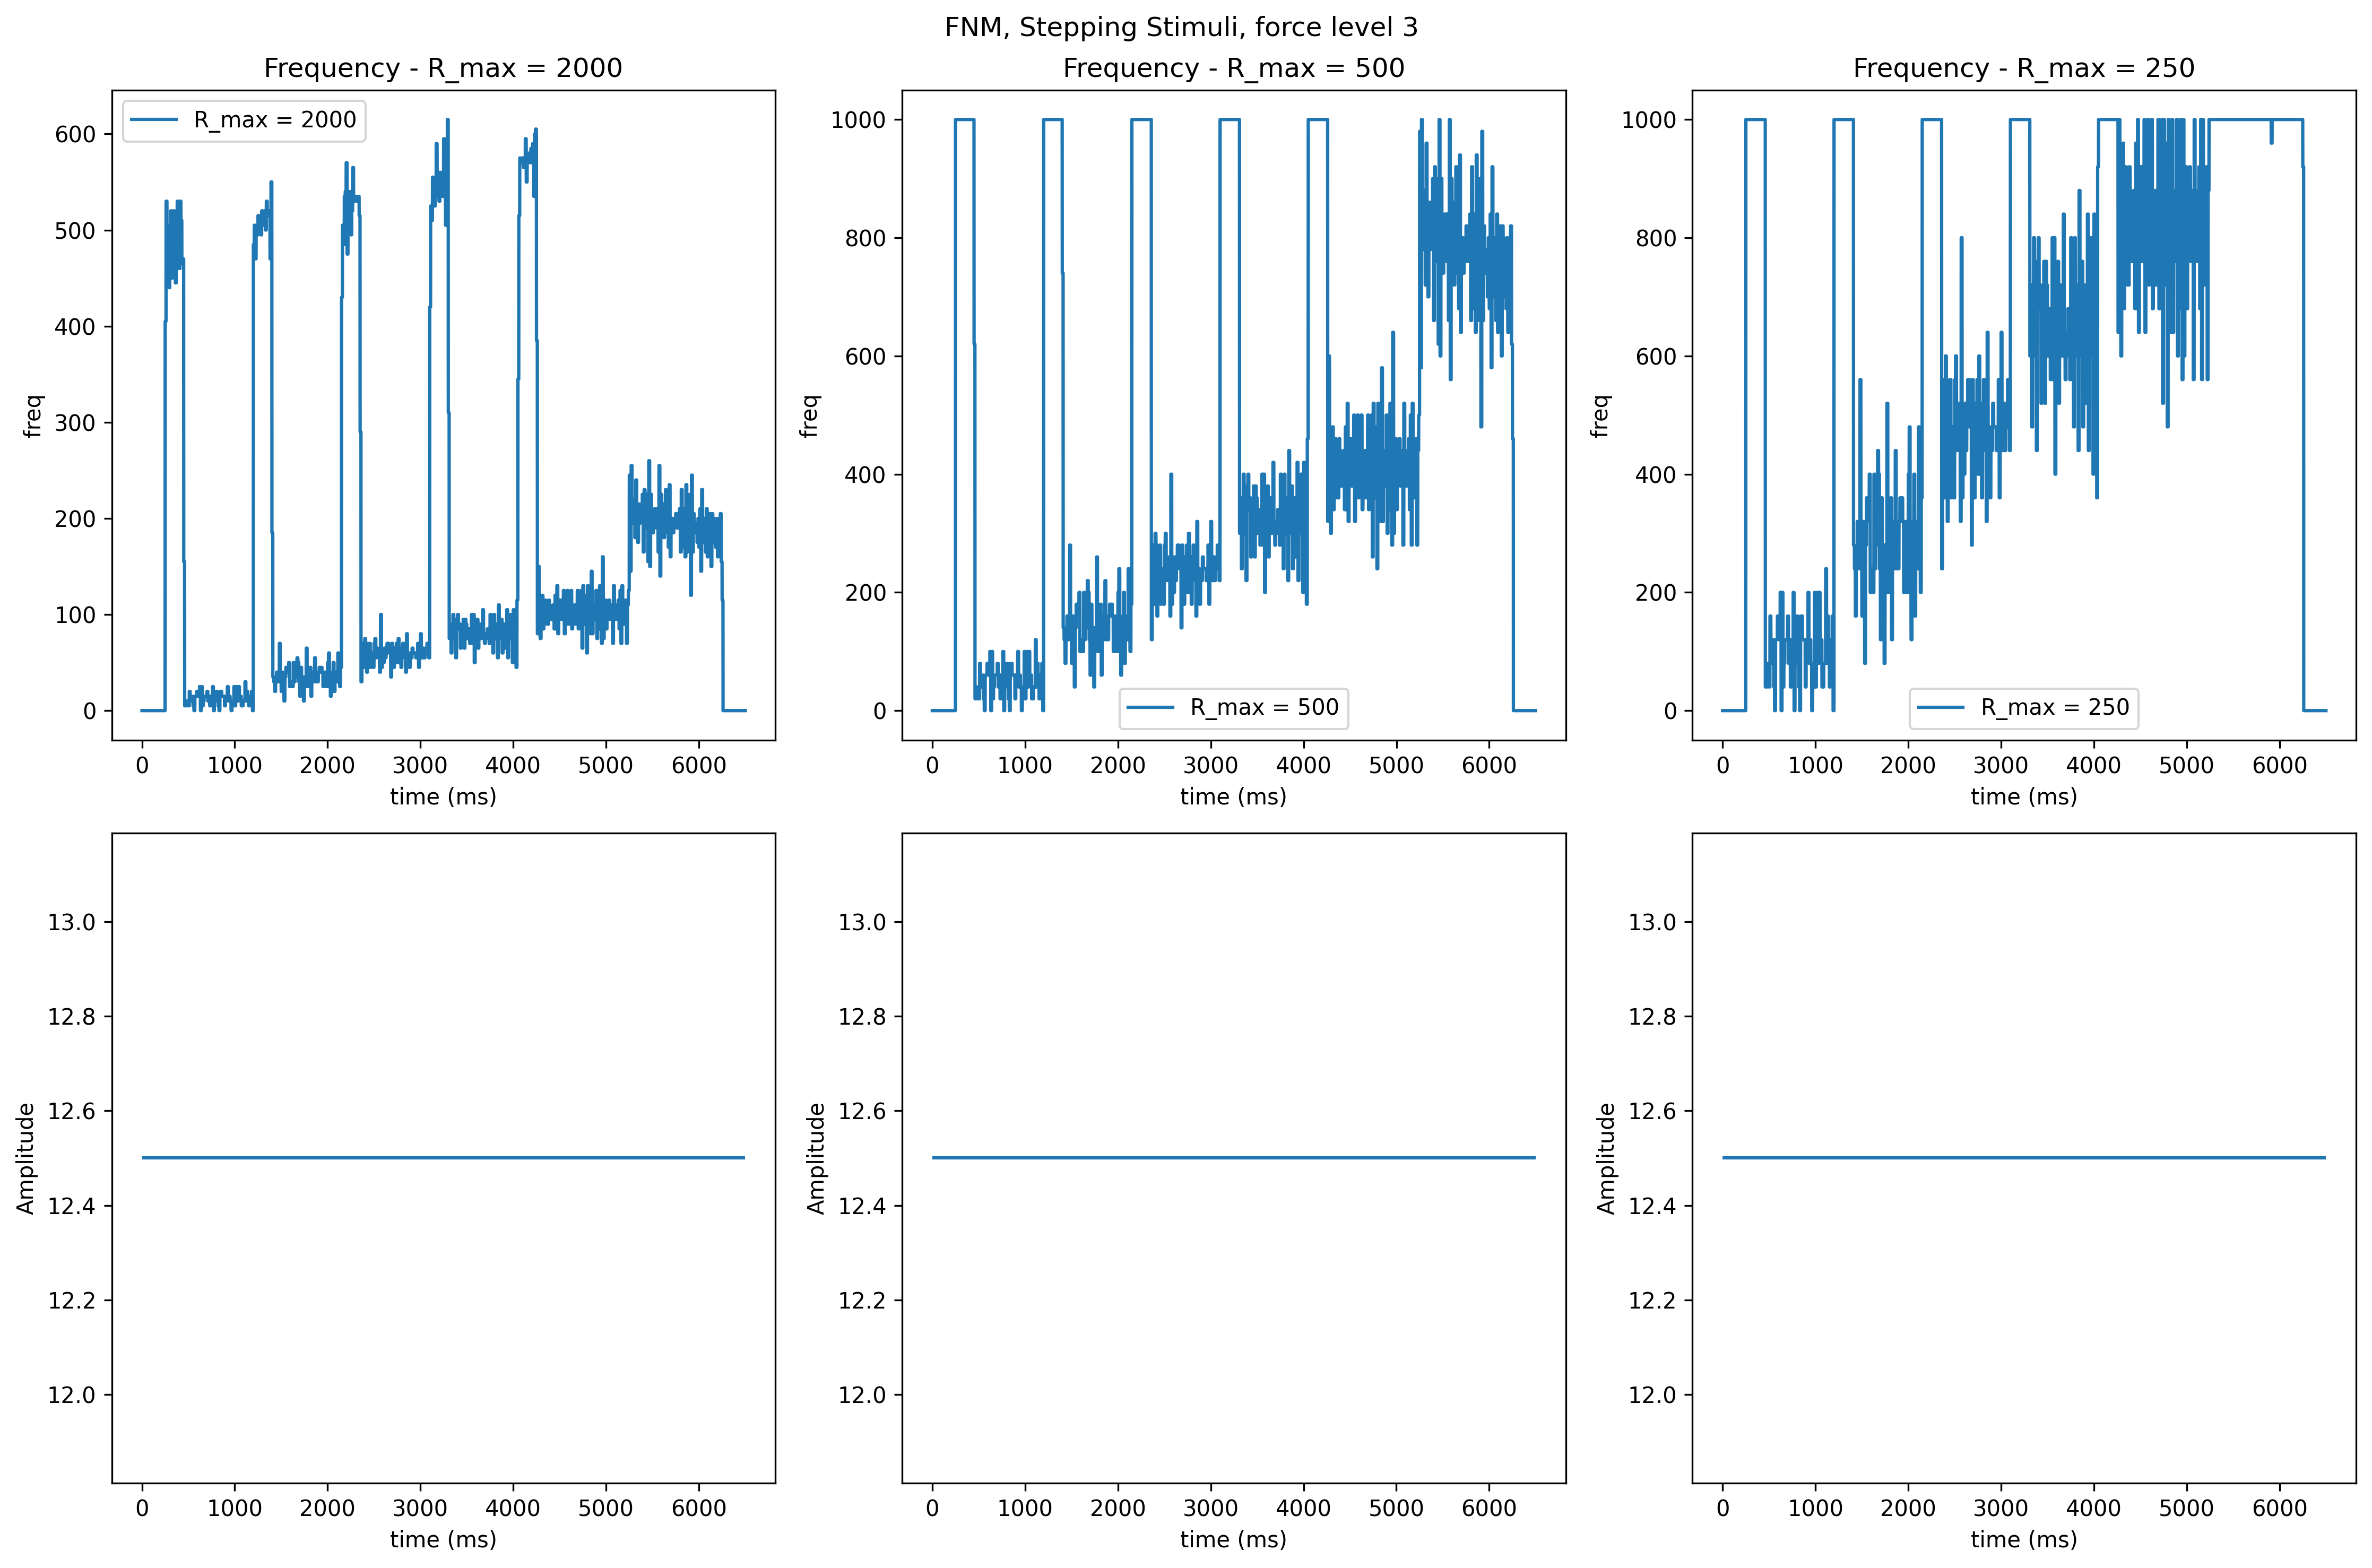

In [12]:
# _____________________ first parameter ___________________________

A_min = 5
A_max = 20
F_min = 0
F_max = 1000

R_max = 2000

A_fixed = np.mean([A_min, A_max])
print("A_fixed: ", A_fixed)

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

print(np.shape(RA_Spikes1))

RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")

# Step 4) The activity of each mechanoreceptor is summed to create a vector of population spike timings, 𝑅

R1 = np.sum(np.array([ RA_population1,  SA_population1 ]), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ]), axis=0)

print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")


bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")

F1_binned = np.copy(R1_binned)
F1_binned =  F1_binned   # transforming spikes per 10 ms bin into Hz

# when R_bin > R_max
F1_binned = np.where(F1_binned > R_max, F_max,  F_min + (F_max - F_min) * (R1_binned/R_max))

print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

repeat_factor = 10   
F1 = np.repeat(F1_binned, repeat_factor, axis=0)



F2_binned = np.copy(R2_binned)
F2_binned = F2_binned   # transforming spikes per 10 ms bin into Hz
F2_binned = np.where(F2_binned > R_max, F_max,  F_min + (F_max - F_min) * (R2_binned/R_max))

print("F2_binned shape: ", np.shape(F2_binned), "should be (650, 3)")

repeat_factor = 10   
F2_first_pair = np.repeat(F2_binned, repeat_factor, axis=0)


# -------------------- second parameter ---------------------
A_min = 5
A_max = 20
F_min = 0
F_max = 1000

R_max = 500

A_fixed = np.mean([A_min, A_max])
print("A_fixed: ", A_fixed)

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

print(np.shape(RA_Spikes1))

RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")

# Step 4) The activity of each mechanoreceptor is summed to create a vector of population spike timings, 𝑅

R1 = np.sum(np.array([ RA_population1,  SA_population1 ]), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ]), axis=0)

print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")


bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")

F1_binned = np.copy(R1_binned)
F1_binned =  F1_binned   # transforming spikes per 10 ms bin into Hz

# when R_bin > R_max
F1_binned = np.where(F1_binned > R_max, F_max,  F_min + (F_max - F_min) * (R1_binned/R_max))

print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

repeat_factor = 10   
F1 = np.repeat(F1_binned, repeat_factor, axis=0)



F2_binned = np.copy(R2_binned)
F2_binned = F2_binned   # transforming spikes per 10 ms bin into Hz
F2_binned = np.where(F2_binned > R_max, F_max,  F_min + (F_max - F_min) * (R2_binned/R_max))

print("F2_binned shape: ", np.shape(F2_binned), "should be (650, 3)")

repeat_factor = 10   
F2_second_pair = np.repeat(F2_binned, repeat_factor, axis=0)



# ++++++++++++++++++++++++++ third parameter +++++++++++++++++++++++++++

A_min = 5
A_max = 20
F_min = 0
F_max = 1000

R_max = 250

A_fixed = np.mean([A_min, A_max])
print("A_fixed: ", A_fixed)

RA_Spikes1 = file["RA_Spikes1"]
RA_Spikes2 = file["RA_Spikes2"]
SA1_Spikes1 = file["SA1_Spikes1"]
SA1_Spikes2 = file["SA1_Spikes2"]

print(np.shape(RA_Spikes1))

RA_population1 = np.sum(RA_Spikes1, axis= 0)
RA_population2 = np.sum(RA_Spikes2, axis= 0)
SA_population1 = np.sum(SA1_Spikes1, axis= 0)
SA_population2 = np.sum(SA1_Spikes2, axis= 0)


print("population activity shape: ", np.shape(RA_population1), "should be (6500, 3)")

# Step 4) The activity of each mechanoreceptor is summed to create a vector of population spike timings, 𝑅

R1 = np.sum(np.array([ RA_population1,  SA_population1 ]), axis=0)
R2 = np.sum(np.array([ RA_population2,  SA_population2 ]), axis=0)

print("summed types activity shape: ", np.shape(R1), "should be (6500, 3)")


bin_size = 10
R1_binned = np.zeros([650, 3])
R2_binned = np.zeros([650, 3])

for i in range(3):  # for every force level
    R1_binned[:, i] = R1[:, i][:(R1[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)
    R2_binned[:, i] = R2[:, i][:(R2[:, i].size // bin_size) * bin_size].reshape(-1, bin_size).mean(axis=1)


# Scaling R_bin jto Hz by multiplying values by 100
R1_binned = 100 * R1_binned
R2_binned = 100 * R2_binned


print("R1_binned shape: ", np.shape(R1_binned), "should be (650, 3)")

F1_binned = np.copy(R1_binned)
F1_binned =  F1_binned   # transforming spikes per 10 ms bin into Hz

# when R_bin > R_max
F1_binned = np.where(F1_binned > R_max, F_max,  F_min + (F_max - F_min) * (R1_binned/R_max))

print("F1_binned shape: ", np.shape(F1_binned), "should be (650, 3)")

repeat_factor = 10   
F1 = np.repeat(F1_binned, repeat_factor, axis=0)



F2_binned = np.copy(R2_binned)
F2_binned = F2_binned   # transforming spikes per 10 ms bin into Hz
F2_binned = np.where(F2_binned > R_max, F_max,  F_min + (F_max - F_min) * (R2_binned/R_max))

print("F2_binned shape: ", np.shape(F2_binned), "should be (650, 3)")

repeat_factor = 10   
F2_third_pair = np.repeat(F2_binned, repeat_factor, axis=0)




fig, ax = plt.subplots(nrows=2, ncols=3, dpi=300, figsize=(15, 10))

# Plot Frequency data
for i, force_level in enumerate(F2_first_pair.T):
    if i == 2:
        ax[0, 0].plot(range(len(force_level)), force_level, label=f"R_max = 2000")
        ax[0, 0].set_title("Frequency - R_max = 2000")
        ax[0, 0].set_xlabel("time (ms)")
        ax[0, 0].set_ylabel("freq")
for i, force_level in enumerate(F2_second_pair.T):
    if i == 2:
        ax[0, 1].plot(range(len(force_level)), force_level, label=f"R_max = 500")
        ax[0, 1].set_title("Frequency - R_max = 500")
        ax[0, 1].set_xlabel("time (ms)")
        ax[0, 1].set_ylabel("freq")


for i, force_level in enumerate(F2_third_pair.T):
    if i == 2:
        ax[0, 2].plot(range(len(force_level)), force_level, label=f"R_max = 250")
        ax[0, 2].set_title("Frequency - R_max = 250")
        ax[0, 2].set_xlabel("time (ms)")
        ax[0, 2].set_ylabel("freq")



# Plot the horizontal lines in the third subplot
ax[1, 0].hlines(A_fixed, xmin=0, xmax=6500)
ax[1, 1].hlines(A_fixed, xmin=0, xmax=6500)
ax[1, 2].hlines(A_fixed, xmin=0, xmax=6500)

# Titles and labels for the second row
for i in range(3):
    ax[1, i].set_ylabel("Amplitude")
    ax[1, i].set_xlabel("time (ms)")

# Set titles and legends
ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 2].legend()

# Set overall title
fig.suptitle("FNM, Stepping Stimuli, force level 3 ")

plt.tight_layout()
plt.show()



### Explain in a few sentences what stimulus information is lost and gained by these choices for parameter values.

The plots show that the FNM encoding model is also sensitive to the choice of parameters. We observe that when we lower the R_max threshold from 500 to 250, the second to last step has almost the same intensity of the last step. Lowering the threshold even more by 200 would result in the model being insensitive to the change in stimulus intensity between the last steps of our stimulus. Thus, we lose both dynamic (about a change in our stimulus) and static information(the intensity of our stimulus). 